In [ ]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive')

# Load data from CSV file
data_path = '/content/gdrive/My Drive/SideEffectsPaperFINALtables/refiltered_2022_2024_with_sentiment_keyterm_filtered_race_lgbtq_genderfiltered_with_zepbound.csv'
data = pd.read_csv(data_path)

# List of side effects and drugs
side_effects = ['Nausea', 'Diarrhea', 'Constipation', 'Vomiting', 'Abdominal Pain', 'Kidney damage',
                'Thyroid tumor', 'Fatigue', 'Dizziness', 'Gastrointestinal', 'Loss of Appetite',
                'Indigestion', 'Dehydration', 'Headache', 'Swelling', 'Hypertension', 'Allergies',
                'COPD', 'Hypoglycemia', 'Anxiety', 'Depression', 'Heart Palpitations', 'Insomnia',
                'Muscle Cramps', 'Skin Rash', 'Hair Loss', 'Elevated Liver Enzymes', 'Pancreatitis',
                'Vision Changes', 'Gallbladder Issues', 'Dry Mouth', 'Sweating', 'Tingling Sensation',
                'Increased Heart Rate', 'Irregular Menstrual Cycles', 'Excessive Thirst',
                'Jaundice', 'GERD', 'Chest Pain', 'Breathing Difficulties', 'Impaired Concentration',
                'Muscle Weakness', 'Joint Pain', 'Elevated Blood Sugar Levels', 'Seizures', 'Liver Damage',
                'Rash', 'Heat Intolerance', 'Memory Problems', 'Sore Throat', 'Digestive Bleeding',
                'Drowsiness', 'Restlessness', 'Chest Tightness', 'Erectile Dysfunction', 'Facial Swelling',
                'Hand Tremors', 'Persistent Cough', 'Hives', 'Back Pain', 'Shortness of Breath',
                'Abnormal Heart Rhythms', 'Blood Clots', 'Fainting', 'Ear Ringing', 'Elevated Cholesterol Levels',
                'Breast Tenderness', 'Fever', 'Skin Sensitivity', 'Unusual Fatigue', 'Mood Swings']

drugs = ['Ozempic', 'Mounjaro', 'Tirzepatide', 'Wegovy', 'Semaglutide', 'GLP-1', 'Zepbound']
keywords = {
    'Ozempic': ['ozempic', 'ozempy'],
    'Mounjaro': ['mounjaro'],
    'Tirzepatide': ['tirzepatide'],
    'Wegovy': ['wegovy'],
    'Semaglutide': ['semaglutide'],
    'GLP-1': ['glp-1', 'glp-1 agonist', 'glp-1s'],
    'Zepbound': ['zepbound']
}

# Initialize counts
drug_mentions = {drug: 0 for drug in drugs}
drug_side_effect_counts = {drug: {se: 0 for se in side_effects} for drug in drugs}

# Process each post
for _, row in data.iterrows():
    message = str(row['Message']).lower()  # Convert to lowercase for consistent matching
    if pd.isna(message) or message.strip() == '':
        continue  # Skip if the message is NaN or empty

    # Identify mentioned drugs
    mentioned_drugs = set()
    for drug, drug_keywords in keywords.items():
        if any(keyword in message for keyword in drug_keywords):
            mentioned_drugs.add(drug)
            drug_mentions[drug] += 1  # Count the drug mention

    # Count side effects for mentioned drugs
    for side_effect in side_effects:
        if side_effect.lower() in message:  # Match side effect
            for drug in mentioned_drugs:  # Count only for mentioned drugs
                drug_side_effect_counts[drug][side_effect] += 1

# Convert counts to DataFrame
df_counts = pd.DataFrame(drug_side_effect_counts).T

# Calculate percentages
df_percentages = pd.DataFrame()
for drug in drugs:
    if drug_mentions[drug] > 0:  # Avoid division by zero
        df_percentages[drug] = (pd.Series(drug_side_effect_counts[drug]) / drug_mentions[drug]) * 100
    else:
        df_percentages[drug] = pd.Series(drug_side_effect_counts[drug])

# Remove rows where all values are zero
df_percentages = df_percentages.loc[~(df_percentages == 0).all(axis=1)]

# Round the percentages to the nearest 100th
df_percentages = df_percentages.round(2)

# Save the result to CSV
output_path = '/content/gdrive/My Drive/SideEffectsPaperFINALtables/table3percofsideeffecmentions.csv'
df_percentages.to_csv(output_path)

# Print metadata
total_unique_posts = len(data)
print(f"Total number of posts analyzed: {total_unique_posts}")
earliest_post_date = data['Post Created Date'].min()
latest_post_date = data['Post Created Date'].max()
print(f"Earliest post date: {earliest_post_date}")
print(f"Latest post date: {latest_post_date}")

# Print the rounded percentage breakdown
print(f"Percentage breakdown (rounded) saved to {output_path}")
print(df_percentages.head())


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


<ipython-input-8-acbc9ef122b4>:9: DtypeWarning: Columns (3,4,6,7,8,9,10,11,12,13,14,15,16,18,19,31,33,35,36,45,48,51,53,54,57,58,59,61,62,67,79,104,105,106,107,108) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(data_path)


Total number of posts analyzed: 64202
Earliest post date: 2022-01-01
Latest post date: 2024-06-13
Percentage breakdown (rounded) saved to /content/gdrive/My Drive/SideEffectsPaperFINALtables/table3percofsideeffecmentions.csv
                Ozempic  Mounjaro  Tirzepatide  Wegovy  Semaglutide  GLP-1  \
Nausea             1.69      2.13         1.14    2.05         1.15   3.23   
Diarrhea           0.83      0.89         0.45    0.97         0.34   1.31   
Constipation       0.76      0.94         0.62    0.96         0.37   1.21   
Vomiting           1.64      3.80         0.40    2.67         0.58   2.31   
Abdominal Pain     0.60      0.47         0.14    0.40         0.13   1.04   

                Zepbound  
Nausea              1.30  
Diarrhea            0.68  
Constipation        0.90  
Vomiting            0.62  
Abdominal Pain      0.11  


In [ ]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive')

# Load data from CSV file
data_path = '/content/gdrive/My Drive/SideEffectsPaperFINALtables/refiltered_2022_2024_with_sentiment_keyterm_filtered_race_lgbtq_genderfiltered_with_zepbound.csv'
data = pd.read_csv(data_path)


Mounted at /content/gdrive


<ipython-input-1-fe457df56c60>:9: DtypeWarning: Columns (3,4,6,7,8,9,10,11,12,13,14,15,16,18,19,31,33,35,36,45,48,51,53,54,57,58,59,61,62,67,79,104,105,106,107,108) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(data_path)


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


<ipython-input-2-72b4ae2c35e7>:10: DtypeWarning: Columns (3,4,6,7,8,9,10,11,12,13,14,15,16,18,19,31,33,35,36,45,48,51,53,54,57,58,59,61,62,67,79,104,105,106,107,108) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(data_path)


Total number of posts analyzed: 39820
Earliest post date: 2022-01-01 00:00:00
Latest post date: 2024-06-13 00:00:00
Ozempic: 18732 posts mention any side effects
Mounjaro: 4031 posts mention any side effects
Tirzepatide: 4202 posts mention any side effects
Wegovy: 8527 posts mention any side effects
Semaglutide: 17146 posts mention any side effects
GLP-1: 4885 posts mention any side effects
Zepbound: 1769 posts mention any side effects


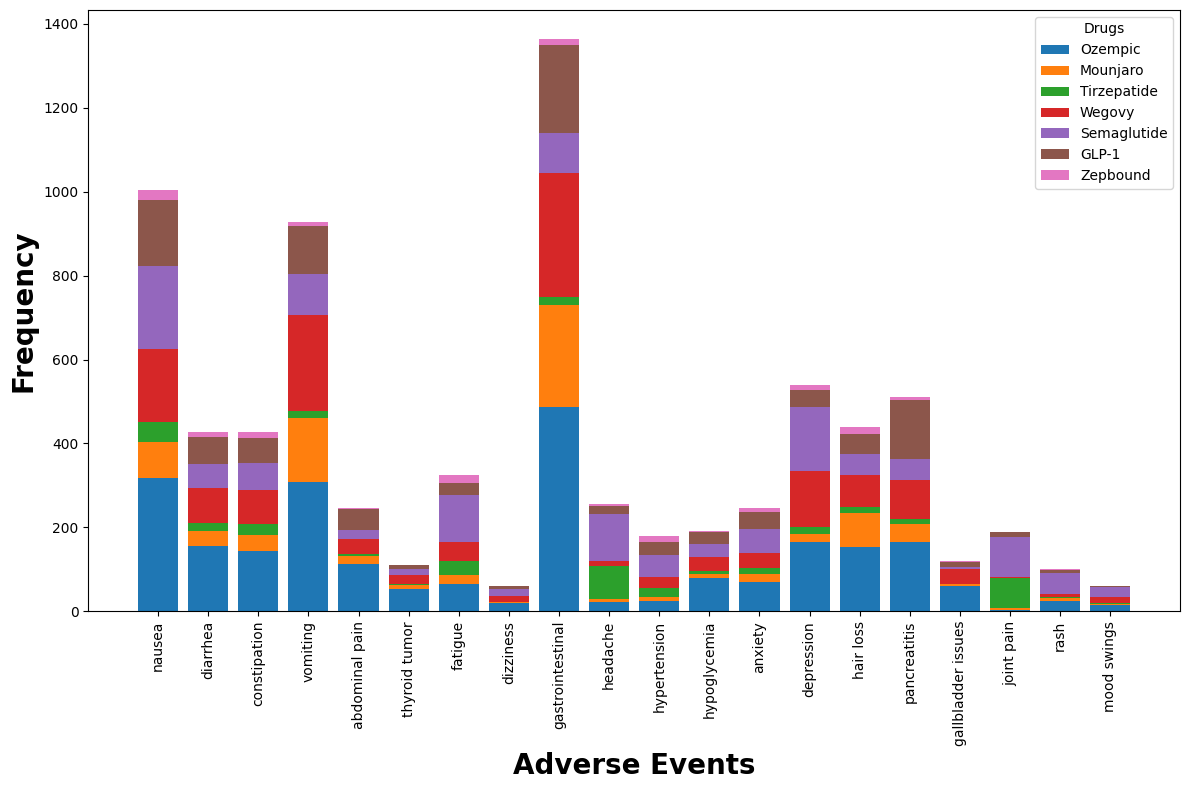

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive')

# Load data from CSV file
data_path = '/content/gdrive/My Drive/SideEffectsPaperFINALtables/refiltered_2022_2024_with_sentiment_keyterm_filtered_race_lgbtq_genderfiltered_with_zepbound.csv'
data = pd.read_csv(data_path)


# Convert 'Post Created Date' to datetime
data['Post Created Date'] = pd.to_datetime(data['Post Created Date'])

# Define the drugs and keywords, excluding Saxenda, Liraglutide, and Victoza
drugs = ['Ozempic', 'Mounjaro', 'Tirzepatide', 'Wegovy', 'Semaglutide', 'GLP-1','Zepbound']
keywords = {
    'Ozempic': ['ozempic', 'ozempy'],
    'Mounjaro': ['mounjaro'],
    'Tirzepatide': ['tirzepatide'],
    'Wegovy': ['wegovy'],
    'Semaglutide': ['semaglutide'],
    'GLP-1': ['glp-1', 'glp-1 agonist', 'glp-1s'],
    'Zepbound': ['zepbound']
}

# Initialize a list of all side effects (as lowercase for comparison)
side_effects = ['Nausea', 'Diarrhea', 'Constipation', 'Vomiting', 'Abdominal Pain', 'Kidney damage',
                'Thyroid tumor', 'Fatigue', 'Dizziness', 'Gastrointestinal', 'Loss of Appetite',
                'Indigestion', 'Dehydration', 'Headache', 'Swelling', 'Hypertension', 'Allergies',
                'COPD', 'Hypoglycemia', 'Anxiety', 'Depression', 'Heart Palpitations', 'Insomnia',
                'Muscle Cramps', 'Skin Rash', 'Hair Loss', 'Elevated Liver Enzymes', 'Pancreatitis',
                'Vision Changes', 'Gallbladder Issues', 'Dry Mouth', 'Sweating', 'Tingling Sensation',
                'Increased Heart Rate', 'Irregular Menstrual Cycles', 'Excessive Thirst',
                'Jaundice', 'GERD', 'Chest Pain', 'Breathing Difficulties', 'Impaired Concentration',
                'Muscle Weakness', 'Joint Pain', 'Elevated Blood Sugar Levels', 'Seizures', 'Liver Damage',
                'Rash', 'Heat Intolerance', 'Memory Problems', 'Sore Throat', 'Digestive Bleeding',
                'Drowsiness', 'Restlessness', 'Chest Tightness', 'Erectile Dysfunction', 'Facial Swelling',
                'Hand Tremors', 'Persistent Cough', 'Hives', 'Back Pain', 'Shortness of Breath',
                'Abnormal Heart Rhythms', 'Blood Clots', 'Fainting', 'Ear Ringing', 'Elevated Cholesterol Levels',
                'Breast Tenderness', 'Fever', 'Skin Sensitivity', 'Unusual Fatigue', 'Mood Swings']
side_effects = [se.lower() for se in side_effects]

# Create a dictionary to hold counts of each side effect and drug
drug_side_effect_counts = {side_effect: {drug: 0 for drug in drugs} for side_effect in side_effects}

# Initialize a dictionary to track unique post indices for each drug
drug_post_indices = {drug: set() for drug in drugs}

# Process each post to count drug mentions and track unique post indices
for index, row in data.iterrows():
    message = str(row['Message']).lower()  # Convert message to string and lowercase

    # Check which drugs are mentioned in the message
    mentioned_drugs = set()
    for keyword, drug_list in keywords.items():
        if any(drug.lower() in message for drug in drug_list):
            for drug in drugs:
                if drug.lower() in message:
                    mentioned_drugs.add(drug)
                    drug_post_indices[drug].add(index)

    # Count mentions for each side effect
    for side_effect in side_effects:
        if side_effect in message:
            for drug in mentioned_drugs:
                drug_side_effect_counts[side_effect][drug] += 1

# Filter out side effects with frequencies less than 50
filtered_side_effects = {se: counts for se, counts in drug_side_effect_counts.items() if sum(counts.values()) >= 50}

# Extract the filtered side effects and corresponding counts
filtered_side_effect_names = list(filtered_side_effects.keys())
filtered_drug_counts = {drug: [filtered_side_effects[se].get(drug, 0) for se in filtered_side_effect_names] for drug in drugs}

# Print the total number of posts analyzed
total_unique_posts = len(set.union(*drug_post_indices.values()))
print(f"Total number of posts analyzed: {total_unique_posts}")

# Print the earliest and latest post dates
earliest_post_date = data['Post Created Date'].min()
latest_post_date = data['Post Created Date'].max()
print(f"Earliest post date: {earliest_post_date}")
print(f"Latest post date: {latest_post_date}")

# Print the number of posts for each drug that mention any of these side effects
for drug in drugs:
    print(f"{drug}: {len(drug_post_indices[drug])} posts mention any side effects")

# Create a stacked bar chart
plt.figure(figsize=(12, 8))

bottom = [0] * len(filtered_side_effect_names)
for drug in drugs:
    frequencies = [filtered_drug_counts[drug][i] for i in range(len(filtered_side_effect_names))]
    plt.bar(filtered_side_effect_names, frequencies, label=drug, bottom=bottom)
    bottom = [b + f for b, f in zip(bottom, frequencies)]

plt.xlabel("Adverse Events",fontweight = 'bold', fontsize = 20)
plt.ylabel("Frequency", fontweight = 'bold', fontsize = 20)
#plt.title("Frequency of Side Effects for Weight Loss Drugs (Filtered)")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.legend(title='Drugs')  # Add a legend for drugs
plt.tight_layout()
plt.show()

Mounted at /content/gdrive


/tmp/ipython-input-1-2868094258.py:10: DtypeWarning: Columns (3,4,6,7,8,9,10,11,12,13,14,15,16,18,19,31,33,35,36,45,48,51,53,54,57,58,59,61,62,67,79,104,105,106,107,108) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(data_path)
/tmp/ipython-input-1-2868094258.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  side_effects_data['Month'] = side_effects_data['Post Created Date'].dt.to_period('M').astype(str)
/tmp/ipython-input-1-2868094258.py:43: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_trend = monthly_trend.reindex(pd.date_range(start=monthly_trend.index.min(),


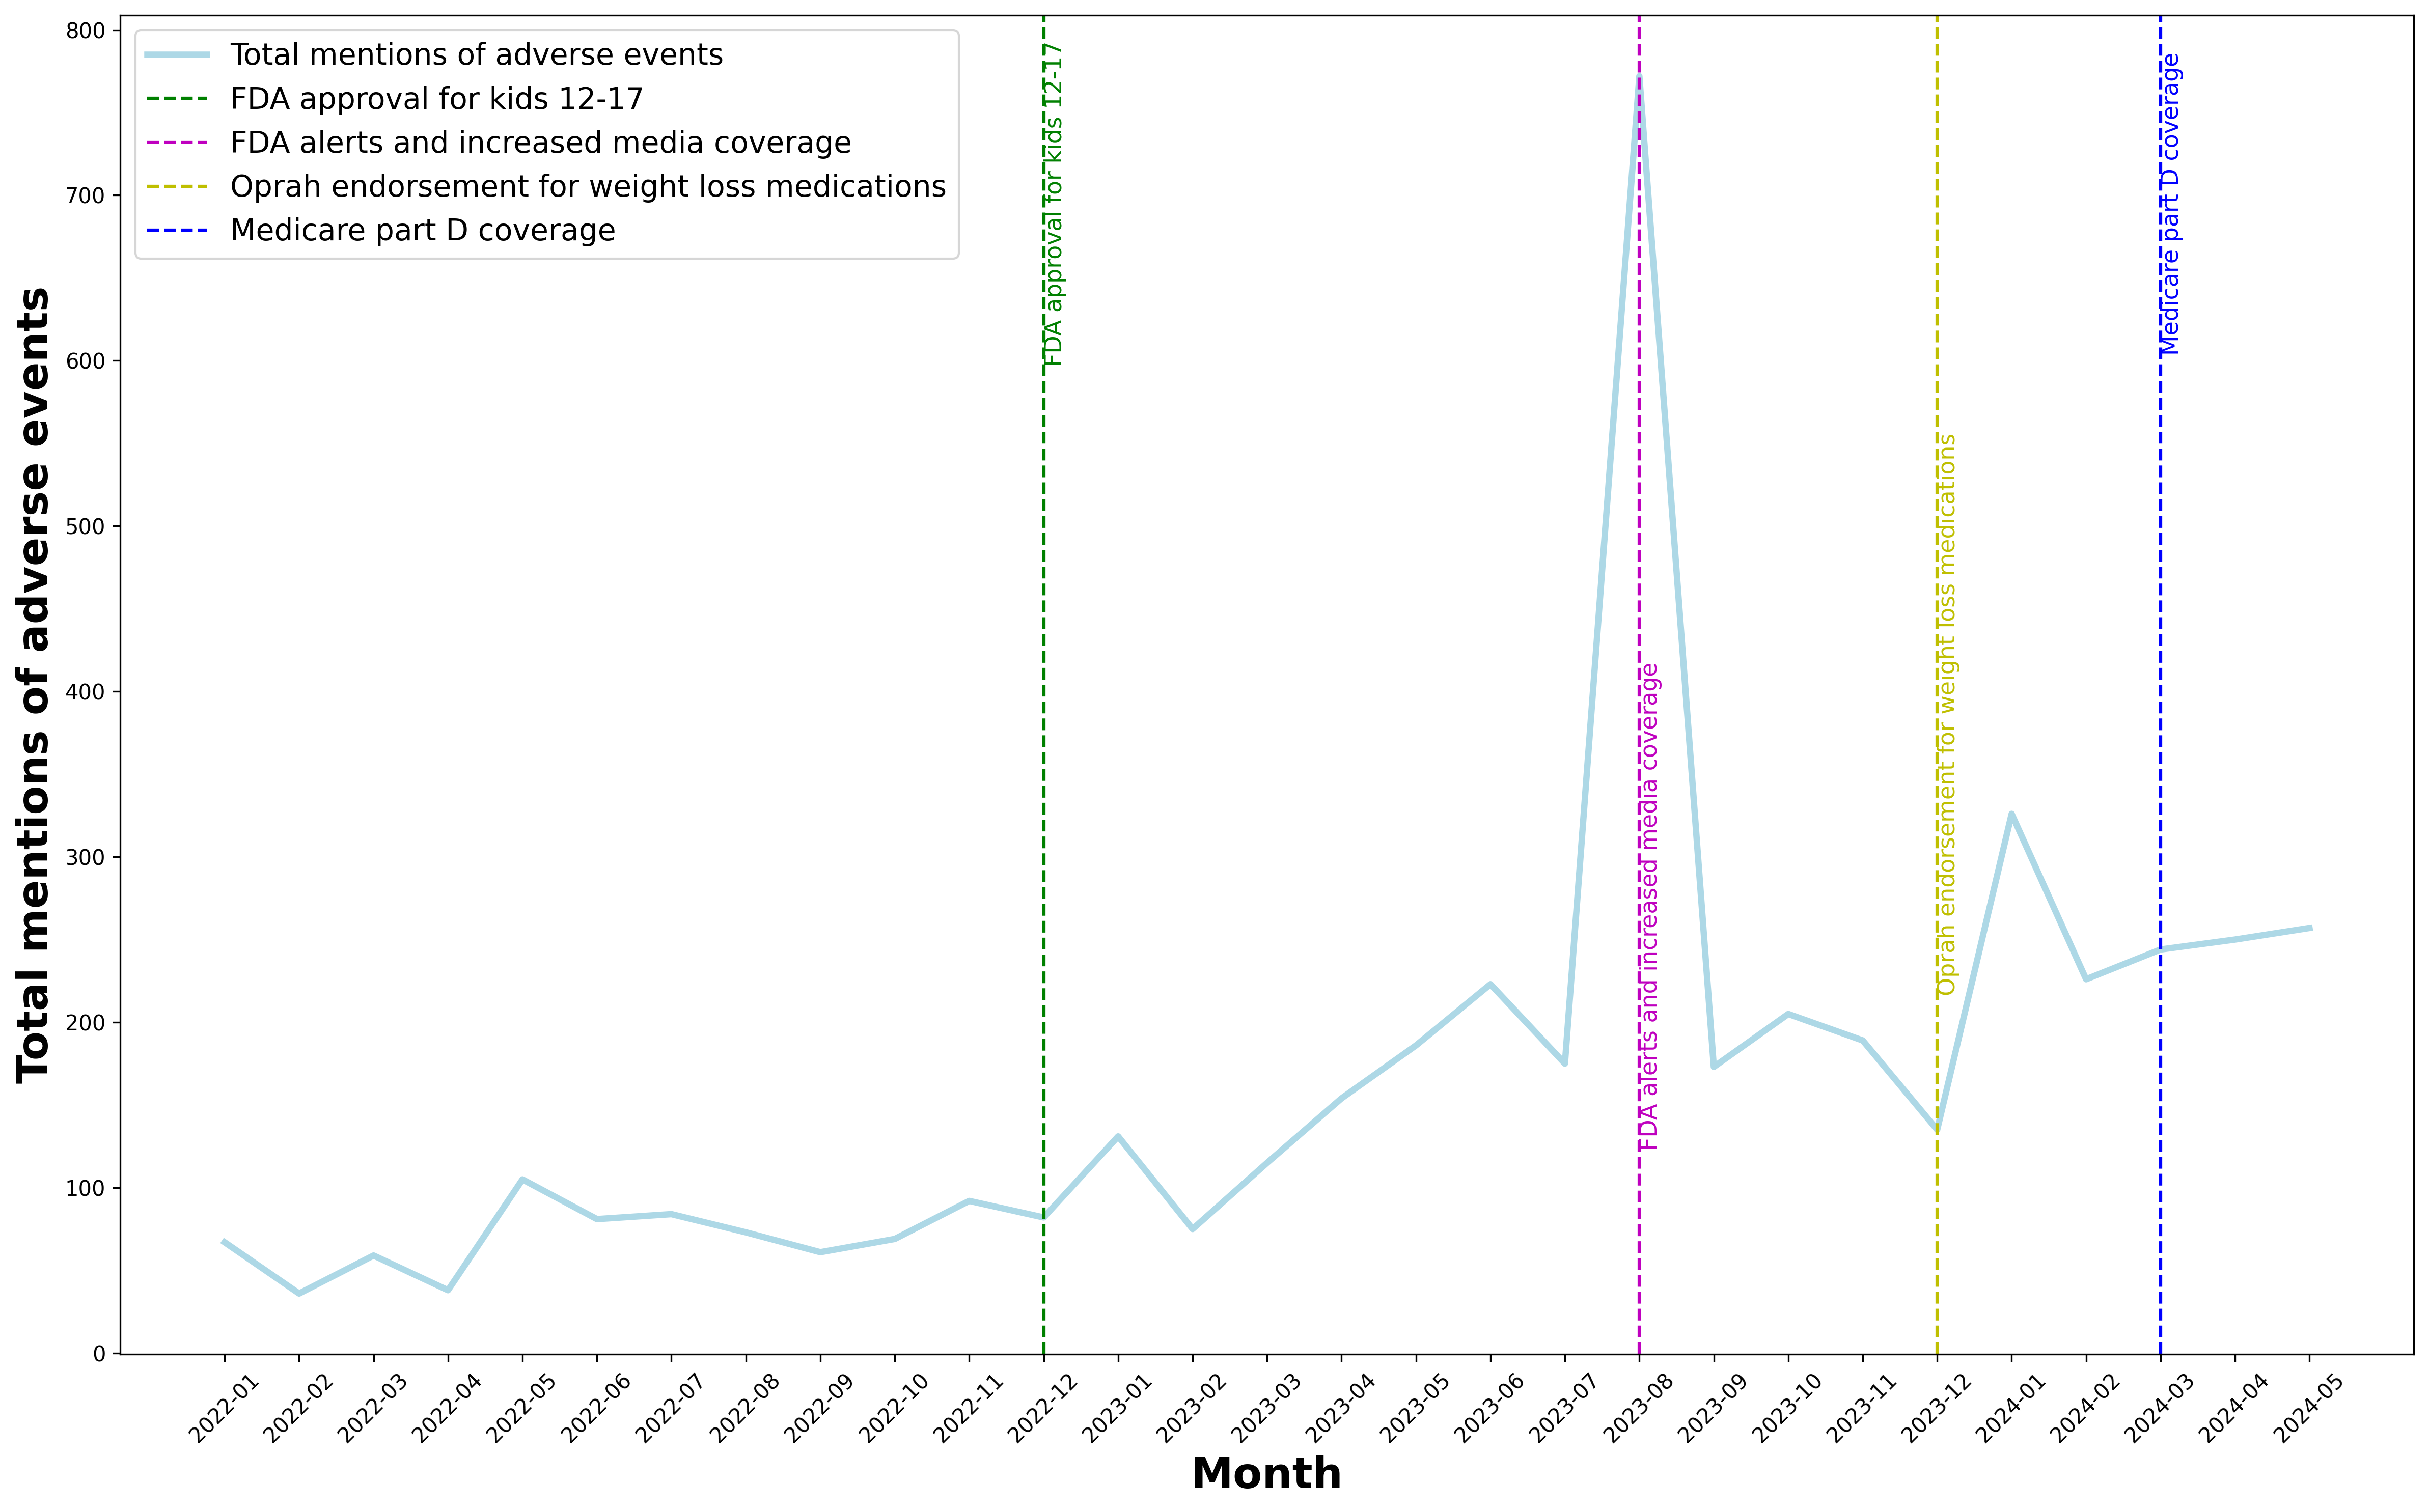

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive')

# Load data from CSV file
data_path = '/content/gdrive/My Drive/SideEffectsPaperFINALtables/refiltered_2022_2024_with_sentiment_keyterm_filtered_race_lgbtq_genderfiltered_with_zepbound.csv'
data = pd.read_csv(data_path)
# Convert 'Post Created Date' to datetime
data['Post Created Date'] = pd.to_datetime(data['Post Created Date'], errors='coerce')

# Drop rows where 'Post Created Date' could not be converted
data = data.dropna(subset=['Post Created Date'])

# Define side effects
side_effects = ['Nausea', 'Diarrhea', 'Constipation', 'Vomiting', 'Abdominal Pain', 'Kidney damage',
                'Thyroid tumor', 'Fatigue', 'Dizziness', 'Gastrointestinal', 'Loss of Appetite',
                'Indigestion', 'Dehydration', 'Headache', 'Swelling', 'Hypertension', 'Allergies',
                'COPD', 'Hypoglycemia', 'Anxiety', 'Depression', 'Heart Palpitations', 'Insomnia',
                'Muscle Cramps', 'Skin Rash', 'Hair Loss', 'Elevated Liver Enzymes', 'Pancreatitis',
                'Vision Changes', 'Gallbladder Issues', 'Dry Mouth', 'Sweating', 'Tingling Sensation',
                'Increased Heart Rate', 'Irregular Menstrual Cycles', 'Excessive Thirst',
                'Jaundice', 'GERD', 'Chest Pain', 'Breathing Difficulties', 'Impaired Concentration',
                'Muscle Weakness', 'Joint Pain', 'Elevated Blood Sugar Levels', 'Seizures', 'Liver Damage',
                'Rash', 'Heat Intolerance', 'Memory Problems', 'Sore Throat', 'Digestive Bleeding',
                'Drowsiness', 'Restlessness', 'Chest Tightness', 'Erectile Dysfunction', 'Facial Swelling',
                'Hand Tremors', 'Persistent Cough', 'Hives', 'Back Pain', 'Shortness of Breath',
                'Abnormal Heart Rhythms', 'Blood Clots', 'Fainting', 'Ear Ringing', 'Elevated Cholesterol Levels',
                'Breast Tenderness', 'Fever', 'Skin Sensitivity', 'Unusual Fatigue', 'Mood Swings']

# Filter data for side effects
side_effects_data = data[data['Message'].str.contains('|'.join(side_effects), case=False, na=False)]

# Extract month and year for grouping
side_effects_data['Month'] = side_effects_data['Post Created Date'].dt.to_period('M').astype(str)

# Group by month and count occurrences of side effects
monthly_trend = side_effects_data.groupby('Month').size()

# Fill missing months with 0
monthly_trend = monthly_trend.reindex(pd.date_range(start=monthly_trend.index.min(),
                                                    end=monthly_trend.index.max(),
                                                    freq='M').strftime('%Y-%m'), fill_value=0)

# Define event dates, labels, and colors
events = {
    'December 1, 2022': ('FDA approval for kids 12-17', 'g'),
    'August 5, 2023': ('FDA alerts and increased media coverage', 'm'),
     'December 23, 2023': ('Oprah endorsement for weight loss medications','y'),
    'March 22, 2024': ('Medicare part D coverage', 'b')
}

# Plotting
plt.figure(figsize=(16, 10), dpi = 300)
plt.plot(monthly_trend.index, monthly_trend, linestyle='-', color='#ADD8E6', linewidth=3, label='Total mentions of adverse events')

for date_str, (label, color) in events.items():
    event_date = pd.Timestamp(date_str)
    plt.axvline(x=event_date.strftime('%Y-%m'), color=color, linestyle='--', label=label)

    # Adjust y_position based on color
    if color == 'm':  # Purple (FDA Alerts)
        y_position = monthly_trend.max() * 0.35
    elif color == 'y':  # Yellow (Oprah Endorsement)
        y_position = monthly_trend.max() * 0.50  # Lower than others
    else:
        y_position = monthly_trend.max() * 0.9  # Default for other labels

    plt.text(event_date.strftime('%Y-%m'), y_position, label, color=color,
             rotation=90, va='center', ha='left', fontsize=11)





# Add labels to the plot
plt.xlabel('Month', fontsize=20, fontweight = 'bold')
plt.ylabel('Total mentions of adverse events', fontsize=20, fontweight = 'bold')
plt.grid(False)
plt.xticks(rotation=45)
plt.legend(fontsize = 14)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive')

# Load data from CSV file
data_path = '/content/gdrive/My Drive/SideEffectsPaperFINALtables/refiltered_2022_2024_with_sentiment_keyterm_filtered_race_lgbtq_genderfiltered_with_zepbound.csv'
data = pd.read_csv(data_path)

Mounted at /content/gdrive


<ipython-input-2-635fdd5b4317>:10: DtypeWarning: Columns (3,4,6,7,8,9,10,11,12,13,14,15,16,18,19,31,33,35,36,45,48,51,53,54,57,58,59,61,62,67,79,104,105,106,107,108) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(data_path)


In [ ]:
import pandas as pd
from google.colab import drive
from collections import defaultdict

# Mount Google Drive
drive.mount('/content/gdrive')

# Load data from CSV file
data_path = '/content/gdrive/My Drive/SideEffectsPaperFINALtables/refiltered_2022_2024_with_sentiment_keyterm_filtered_race_lgbtq_genderfiltered_with_zepbound.csv'
data = pd.read_csv(data_path, low_memory=False)

# Column containing messages (adjust this if the column name differs in your file)
messages = data['Message'].dropna()  # Remove NaN values in the message column

# Predefined list of side effects
side_effects = [
    'Nausea', 'Diarrhea', 'Constipation', 'Vomiting', 'Abdominal Pain', 'Kidney damage',
    'Thyroid tumor', 'Fatigue', 'Dizziness', 'Gastrointestinal', 'Loss of Appetite',
    'Indigestion', 'Dehydration', 'Headache', 'Swelling', 'Hypertension', 'Allergies',
    'COPD', 'Hypoglycemia', 'Anxiety', 'Depression', 'Heart Palpitations', 'Insomnia',
    'Muscle Cramps', 'Skin Rash', 'Hair Loss', 'Elevated Liver Enzymes', 'Pancreatitis',
    'Vision Changes', 'Gallbladder Issues', 'Dry Mouth', 'Sweating', 'Tingling Sensation',
    'Increased Heart Rate', 'Irregular Menstrual Cycles', 'Excessive Thirst', 'Jaundice',
    'GERD', 'Chest Pain', 'Breathing Difficulties', 'Impaired Concentration', 'Muscle Weakness',
    'Joint Pain', 'Elevated Blood Sugar Levels', 'Seizures', 'Liver Damage', 'Rash',
    'Heat Intolerance', 'Memory Problems', 'Sore Throat', 'Digestive Bleeding', 'Drowsiness',
    'Restlessness', 'Chest Tightness', 'Erectile Dysfunction', 'Facial Swelling', 'Hand Tremors',
    'Persistent Cough', 'Hives', 'Back Pain', 'Shortness of Breath', 'Abnormal Heart Rhythms',
    'Blood Clots', 'Fainting', 'Ear Ringing', 'Elevated Cholesterol Levels', 'Breast Tenderness',
    'Fever', 'Skin Sensitivity', 'Unusual Fatigue', 'Mood Swings'
]

# Normalize side effects list to lowercase
side_effects_lower = [effect.lower() for effect in side_effects]

# Preprocessing function to extract side effects
def extract_side_effects(text, side_effects_list):
    """Extract side effects from a single post."""
    words = text.lower().split()  # Tokenize text
    return [word.strip(",.") for word in words if word in side_effects_list]

# Apply preprocessing to each post
data['Extracted Side Effects'] = messages.apply(lambda x: extract_side_effects(x, side_effects_lower))

# Initialize a dictionary to store co-occurrence counts
cooccurrence_dict = defaultdict(lambda: defaultdict(int))

# Calculate co-occurrences
for effects in data['Extracted Side Effects']:
    if len(effects) > 1:  # Consider posts with more than one side effect
        for main_effect in effects:
            for other_effect in effects:
                if main_effect != other_effect:  # Avoid self-co-occurrence
                    # Always store co-occurrences in alphabetical order
                    sorted_effects = tuple(sorted([main_effect, other_effect]))
                    cooccurrence_dict[sorted_effects[0]][sorted_effects[1]] += 1

# Convert co-occurrence data to a DataFrame
all_cooccurrences = []

for main_effect, related_effects in cooccurrence_dict.items():
    for other_effect, count in related_effects.items():
        all_cooccurrences.append({
            "Main Side Effect": main_effect,
            "Co-occurring Side Effect": other_effect,
            "Co-occurrence Count": count
        })

# Create DataFrame for co-occurrences
cooccurrence_df = pd.DataFrame(all_cooccurrences)

# Save the data to a CSV file
output_file = "/content/gdrive/My Drive/SideEffectsPaperFINALtables/side_effect_cooccurrence_analysis_no_duplicates.csv"
cooccurrence_df.to_csv(output_file, index=False)
print(f"Co-occurrence analysis saved to {output_file}")

# Inspect and sort data
print(cooccurrence_df.head())
top_cooccurrences = cooccurrence_df.sort_values(
    by=["Main Side Effect", "Co-occurrence Count"], ascending=[True, False]
)
print(top_cooccurrences.head(20))


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Co-occurrence analysis saved to /content/gdrive/My Drive/SideEffectsPaperFINALtables/side_effect_cooccurrence_analysis_no_duplicates.csv
  Main Side Effect Co-occurring Side Effect  Co-occurrence Count
0          anxiety                  fatigue                   76
1          anxiety               depression                  210
2          anxiety             hypertension                   14
3          anxiety              indigestion                   96
4          anxiety                dizziness                    4
   Main Side Effect Co-occurring Side Effect  Co-occurrence Count
70        allergies         gastrointestinal                   32
69        allergies                  anxiety                   16
71        allergies                  fatigue                   12
67        allergies                 swelling                    4
68        al

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from google.colab import drive
import pandas as pd
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

# Correct file path in Google Drive
data_path = '/content/gdrive/My Drive/SideEffectsPaperFINALtables/refiltered_2022_2024_with_sentiment_keyterm_filtered_race_lgbtq_genderfiltered_with_zepbound.csv'
data = pd.read_csv(data_path)

side_effects = ['Nausea', 'Diarrhea', 'Constipation', 'Vomiting', 'Abdominal Pain', 'Kidney damage',
                'Thyroid tumor', 'Fatigue', 'Dizziness', 'Gastrointestinal', 'Loss of Appetite',
                'Indigestion', 'Dehydration', 'Headache', 'Swelling', 'Hypertension', 'Allergies',
                'COPD', 'Hypoglycemia', 'Anxiety', 'Depression', 'Heart Palpitations', 'Insomnia',
                'Muscle Cramps', 'Skin Rash', 'Hair Loss', 'Elevated Liver Enzymes', 'Pancreatitis',
                'Vision Changes', 'Gallbladder Issues', 'Dry Mouth', 'Sweating', 'Tingling Sensation',
                'Increased Heart Rate', 'Irregular Menstrual Cycles', 'Excessive Thirst',
                'Jaundice', 'GERD', 'Chest Pain', 'Breathing Difficulties', 'Impaired Concentration',
                'Muscle Weakness', 'Joint Pain', 'Elevated Blood Sugar Levels', 'Seizures', 'Liver Damage',
                'Rash', 'Heat Intolerance', 'Memory Problems', 'Sore Throat', 'Digestive Bleeding',
                'Drowsiness', 'Restlessness', 'Chest Tightness', 'Erectile Dysfunction', 'Facial Swelling',
                'Hand Tremors', 'Persistent Cough', 'Hives', 'Back Pain', 'Shortness of Breath',
                'Abnormal Heart Rhythms', 'Blood Clots', 'Fainting', 'Ear Ringing', 'Elevated Cholesterol Levels',
                'Breast Tenderness', 'Fever', 'Skin Sensitivity', 'Unusual Fatigue', 'Mood Swings']
print(len(side_effects))
categories = {
    "Gastrointestinal": {
        "effects": [
            "Gastrointestinal", "Nausea", "Pancreatitis", "Vomiting", "Diarrhea",
            "Constipation", "Abdominal Pain", "Hypoglycemia", "Gallbladder Issues",
            "Loss of Appetite", "GERD", "Indigestion", "Liver Damage", "Jaundice"
        ],
        "color": "lightblue"
    },
    "Neuromuscular": {
        "effects": [
            "Depression", "Anxiety", "Headache", "Dizziness", "Joint Pain", "Mood Swings",
            "Insomnia", "Seizures", "Restlessness", "Muscle Weakness", "Back Pain",
            "Muscle Cramps", "Tingling Sensation"
        ],
        "color": "lightgreen"
    },
    "Cardiovascular and Respiratory": {
        "effects": [
            "Fatigue", "Hypertension", "Dehydration", "COPD", "Blood Clots", "Persistent Cough",
            "Swelling", "Increased Heart Rate", "Heart Palpitations", "Shortness of Breath"
        ],
        "color": "red"
    },
    "Dermatological and Physical": {
        "effects": [
            "Hair Loss", "Rash", "Sweating", "Hives", "Allergies", "Sore Throat",
            "Fever", "Dry Mouth", "Vision Changes"
        ],
        "color": "purple"
    },
    "Metabolic": {
        "effects": [
            "Thyroid Tumor", "Elevated Blood Sugar Levels", "Erectile Dysfunction",
            "Irregular Menstrual Cycle", "Kidney Damage"
        ],
        "color": "orange"
    }
}


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


<ipython-input-15-9886f9f13d2f>:6: DtypeWarning: Columns (3,4,6,7,8,9,10,11,12,13,14,15,16,18,19,31,33,35,36,45,48,51,53,54,57,58,59,61,62,67,79,104,105,106,107,108) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(data_path)


71


In [ ]:
import pandas as pd
from collections import defaultdict

# Load the dataset
data_path = '/content/gdrive/My Drive/SideEffectsPaperFINALtables/refiltered_2022_2024_with_sentiment_keyterm_filtered_race_lgbtq_genderfiltered_with_zepbound.csv'
data = pd.read_csv(data_path, low_memory=False)

# Drop NaN values in 'Message'
messages = data['Message'].dropna()

# Predefined list of side effects with correct casing
side_effects = ['Nausea', 'Diarrhea', 'Constipation', 'Vomiting', 'Abdominal Pain', 'Kidney damage',
                'Thyroid tumor', 'Fatigue', 'Dizziness', 'Gastrointestinal', 'Loss of Appetite',
                'Indigestion', 'Dehydration', 'Headache', 'Swelling', 'Hypertension', 'Allergies',
                'COPD', 'Hypoglycemia', 'Anxiety', 'Depression', 'Heart Palpitations', 'Insomnia',
                'Muscle Cramps', 'Skin Rash', 'Hair Loss', 'Elevated Liver Enzymes', 'Pancreatitis',
                'Vision Changes', 'Gallbladder Issues', 'Dry Mouth', 'Sweating', 'Tingling Sensation',
                'Increased Heart Rate', 'Irregular Menstrual Cycles', 'Excessive Thirst',
                'Jaundice', 'GERD', 'Chest Pain', 'Breathing Difficulties', 'Impaired Concentration',
                'Muscle Weakness', 'Joint Pain', 'Elevated Blood Sugar Levels', 'Seizures', 'Liver Damage',
                'Rash', 'Heat Intolerance', 'Memory Problems', 'Sore Throat', 'Digestive Bleeding',
                'Drowsiness', 'Restlessness', 'Chest Tightness', 'Erectile Dysfunction', 'Facial Swelling',
                'Hand Tremors', 'Persistent Cough', 'Hives', 'Back Pain', 'Shortness of Breath',
                'Abnormal Heart Rhythms', 'Blood Clots', 'Fainting', 'Ear Ringing', 'Elevated Cholesterol Levels',
                'Breast Tenderness', 'Fever', 'Skin Sensitivity', 'Unusual Fatigue', 'Mood Swings']

# Create lowercase mapping for detection
side_effects_lower = [effect.lower() for effect in side_effects]
lower_to_original = {effect.lower(): effect for effect in side_effects}

# Function to extract side effects from a single message
def extract_side_effects(text, side_effects_list):
    words = text.lower().split()
    matched = [word.strip(",.") for word in words if word in side_effects_list]
    return [lower_to_original[word] for word in matched]

# Apply to dataset
data['Extracted Side Effects'] = messages.apply(lambda x: extract_side_effects(x, side_effects_lower))

# Compute co-occurrence matrix
cooccurrence_dict = defaultdict(lambda: defaultdict(int))

for effects in data['Extracted Side Effects']:
    if len(effects) > 1:
        for main_effect in effects:
            for other_effect in effects:
                if main_effect != other_effect:
                    sorted_effects = tuple(sorted([main_effect, other_effect]))
                    cooccurrence_dict[sorted_effects[0]][sorted_effects[1]] += 1

# Convert to DataFrame
all_cooccurrences = []

for main_effect, related_effects in cooccurrence_dict.items():
    for other_effect, count in related_effects.items():
        all_cooccurrences.append({
            "Main Side Effect": main_effect,
            "Co-occurring Side Effect": other_effect,
            "Co-occurrence Count": count
        })

cooccurrence_df = pd.DataFrame(all_cooccurrences)

# Save to CSV
output_file = "/content/gdrive/My Drive/SideEffectsPaperFINALtables/side_effect_cooccurrence_analysis_no_duplicates.csv"
cooccurrence_df.to_csv(output_file, index=False)
print(f"Co-occurrence analysis saved to {output_file}")

# Sort and print top
top_cooccurrences = cooccurrence_df.sort_values(
    by=["Main Side Effect", "Co-occurrence Count"], ascending=[True, False]
)
print(top_cooccurrences.head(20))


Co-occurrence analysis saved to /content/gdrive/My Drive/SideEffectsPaperFINALtables/side_effect_cooccurrence_analysis_no_duplicates.csv
   Main Side Effect Co-occurring Side Effect  Co-occurrence Count
70        Allergies         Gastrointestinal                   32
69        Allergies                  Anxiety                   16
71        Allergies                  Fatigue                   12
67        Allergies                 Swelling                    4
68        Allergies                Dizziness                    2
72        Allergies             Pancreatitis                    2
73        Allergies                 Insomnia                    2
74        Allergies              Dehydration                    2
75        Allergies              Indigestion                    2
1           Anxiety               Depression                  210
3           Anxiety              Indigestion                   96
0           Anxiety                  Fatigue                   76
11   

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


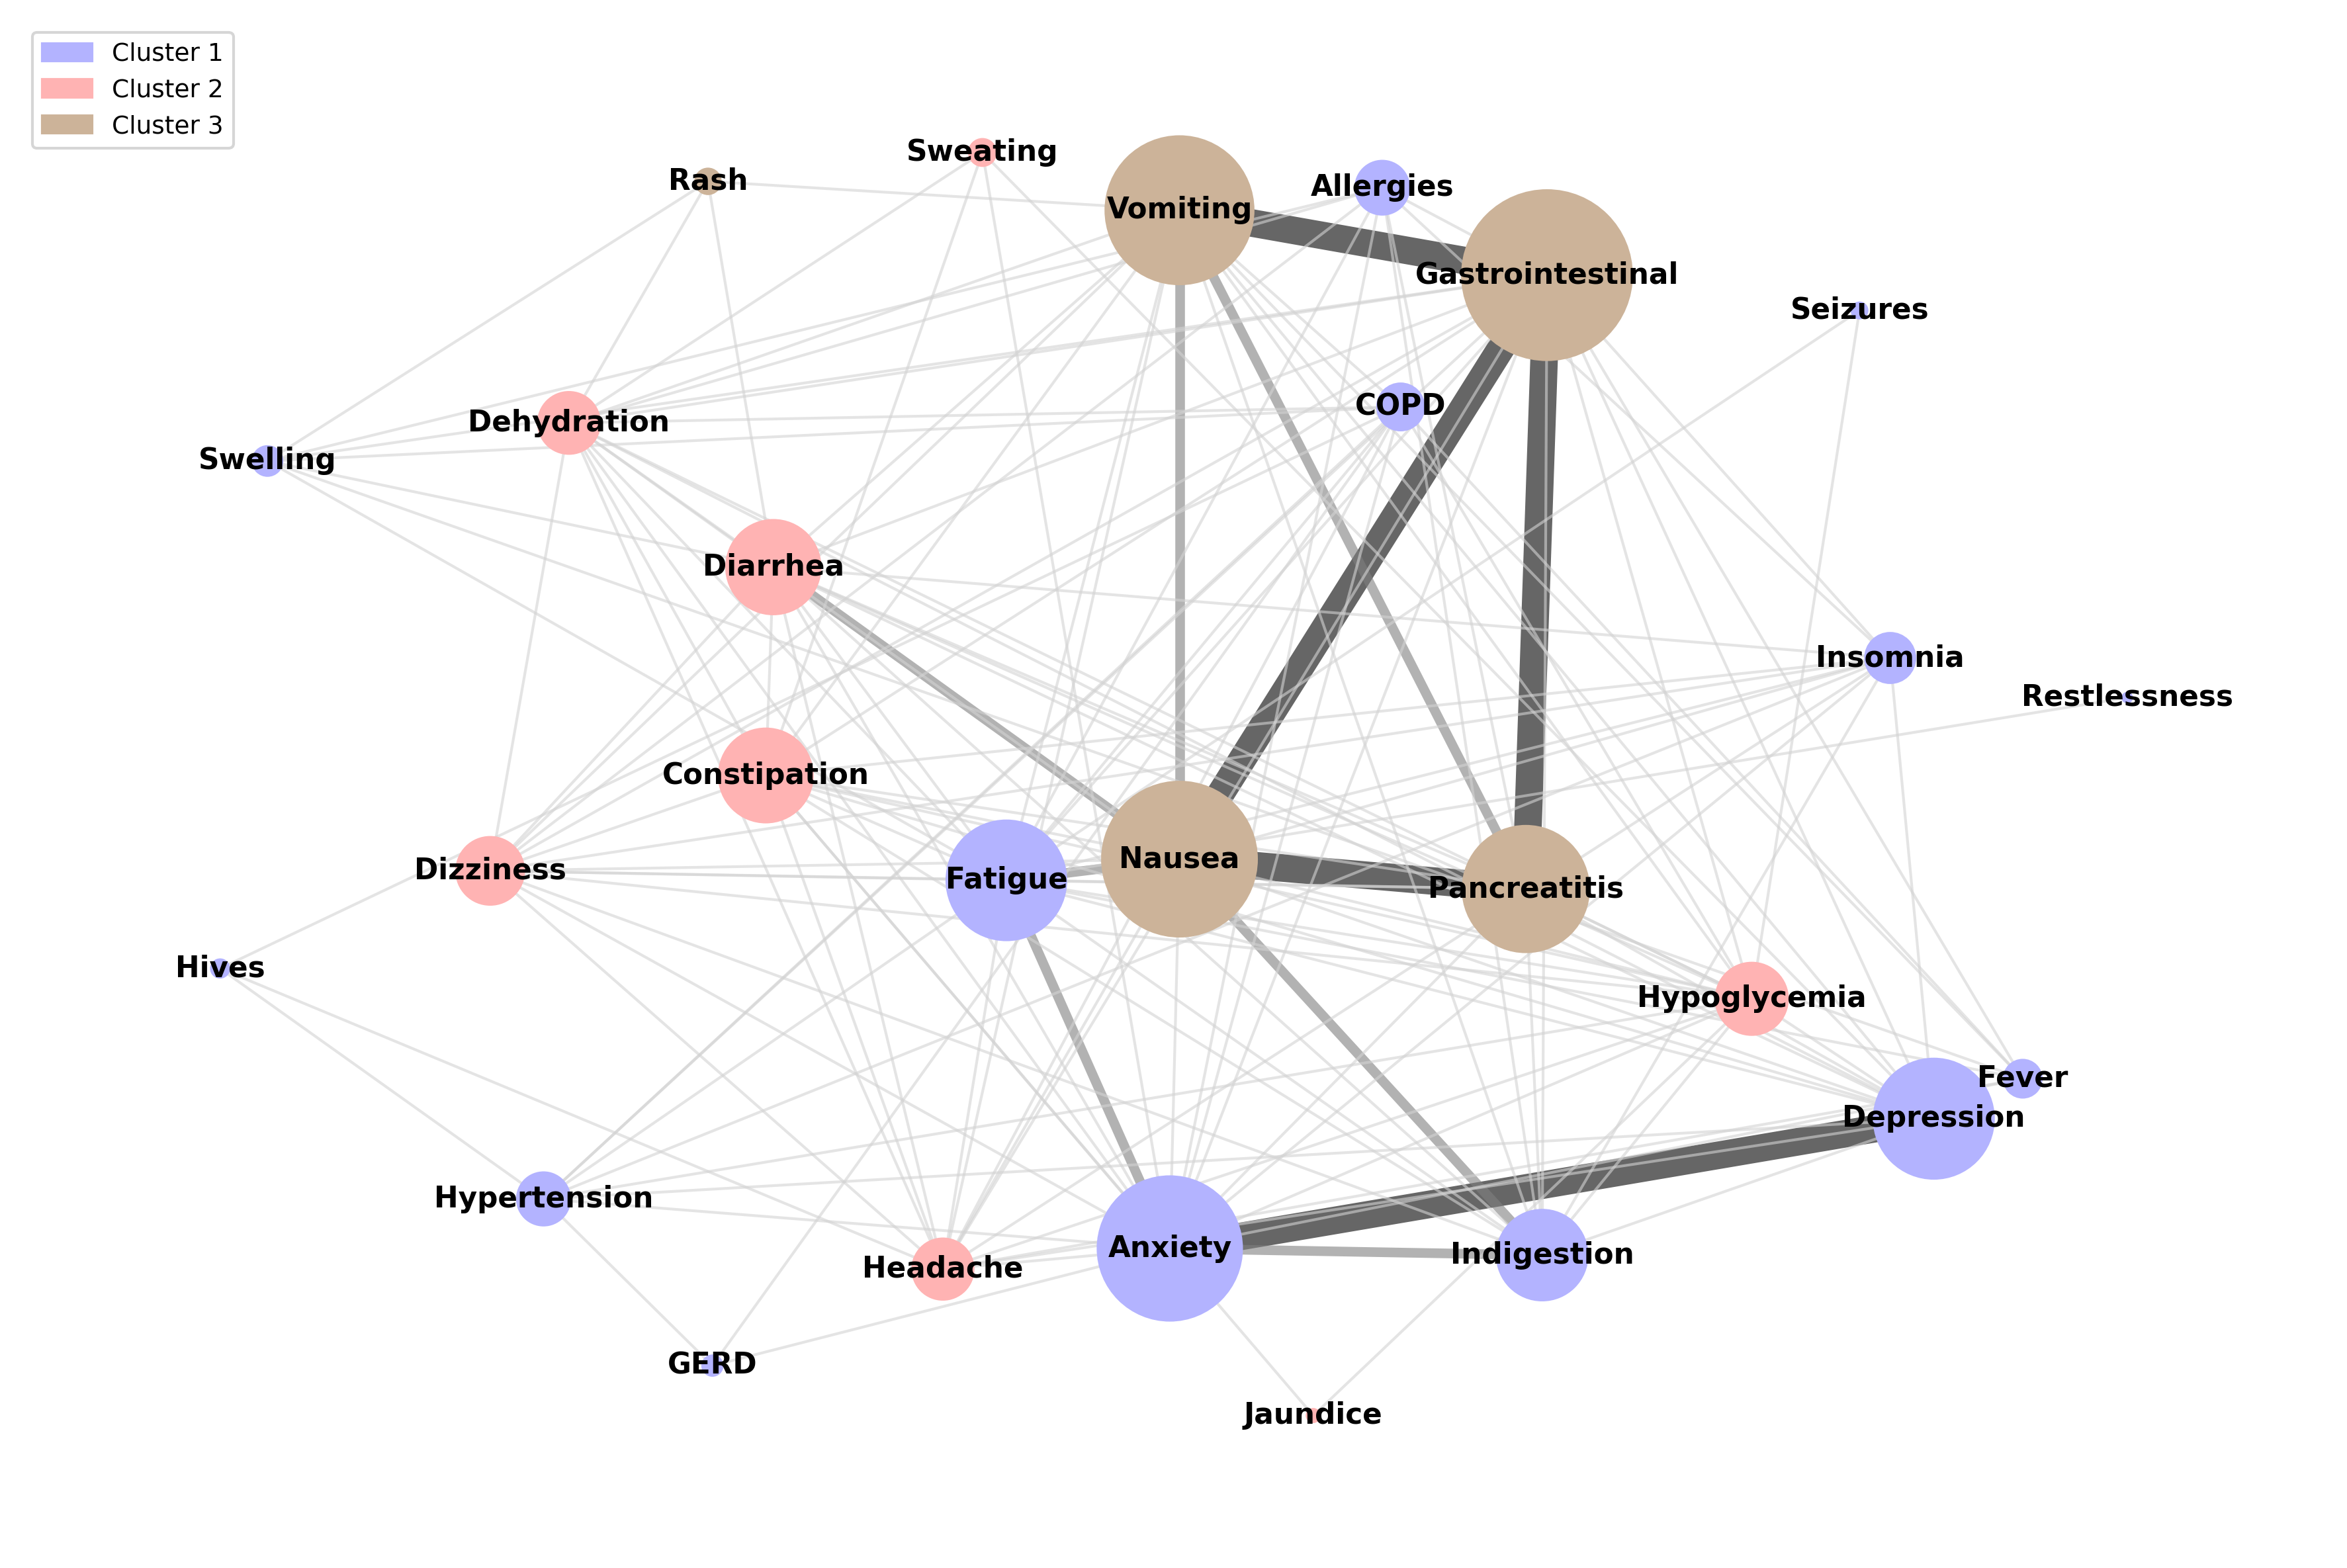

In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from community import community_louvain
from matplotlib import patches
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive')

# Load your co-occurrence data
cooccurrence_df = pd.read_csv("/content/gdrive/My Drive/SideEffectsPaperTables/side_effect_cooccurrence_analysis_no_duplicates.csv")

# Create the graph
G = nx.Graph()

# Add nodes
for effect in cooccurrence_df['Main Side Effect'].unique():
    G.add_node(effect)

# Add edges for all co-occurrences
for _, row in cooccurrence_df.iterrows():
    effect1 = row["Main Side Effect"]
    effect2 = row["Co-occurring Side Effect"]
    count = row["Co-occurrence Count"]
    G.add_edge(effect1, effect2, weight=count)

# Apply Louvain community detection
partition = community_louvain.best_partition(G)

# Map node sizes based on co-occurrence sum
cooccurrence_sums = {effect: 0 for effect in set(cooccurrence_df['Main Side Effect'].unique()).union(cooccurrence_df['Co-occurring Side Effect'].unique())}
for _, row in cooccurrence_df.iterrows():
    effect1 = row["Main Side Effect"]
    effect2 = row["Co-occurring Side Effect"]
    count = row["Co-occurrence Count"]
    cooccurrence_sums[effect1] += count
    cooccurrence_sums[effect2] += count

node_sizes = [cooccurrence_sums.get(node, 0) * 5 for node in G.nodes()]

# Define custom colors for each community
community_colors = {
    0: (0.7, 0.7, 1, 1),  # Light Blue (Gastrointestinal Distress)
    1: (1, 0.7, 0.7, 1),  # Light Pink (Neurological and Inflammatory Discomfort)
    2: (0.8, 0.7, 0.6, 1)  # Light Brown (Somatic and Metabolic Symptoms)
}

# Map node colors based on community
node_colors = [community_colors[partition[node]] for node in G.nodes()]

# Use spring layout
pos = nx.spring_layout(G, seed=42, k=12.0, iterations=150)

# Manually adjust key node positions
pos['depression'] = [0.8, -0.5]
pos['anxiety'] = [0.01,-0.7]
pos['gastrointestinal'] = [0.4,0.8]
pos['nausea'] = [0.02,-0.1]
pos['vomiting'] = [0.02,0.9]
pos['diarrhea'] = [-0.4,0.35]

plt.figure(figsize=(15, 10), dpi = 300)

# Separate edges based on weight
edges = G.edges(data=True)
thick_edges = [(u, v) for u, v, d in edges if d['weight'] >= 100]
medium_edges = [(u, v) for u, v, d in edges if 50 <= d['weight'] < 100]
thin_edges = [(u, v) for u, v, d in edges if d['weight'] < 50]

# Draw edges
nx.draw_networkx_edges(G, pos, edgelist=thick_edges, width=10, edge_color="black", alpha=0.6)
nx.draw_networkx_edges(G, pos, edgelist=medium_edges, width=3.5, edge_color="gray", alpha=0.6)
nx.draw_networkx_edges(G, pos, edgelist=thin_edges, width=1, edge_color="lightgray", alpha=0.6)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes)

# Format labels: Title Case except for acronyms
acronyms = {"COPD", "GERD"}
formatted_labels = {
    node: node.upper() if node.upper() in acronyms else node.title()
    for node in G.nodes()
}

# Draw labels
nx.draw_networkx_labels(G, pos, labels=formatted_labels, font_size=10.5, font_weight="bold")

# Add legend
legend_patches = [
    patches.Patch(color=community_colors[0], label="Cluster 1"),
    patches.Patch(color=community_colors[1], label="Cluster 2"),
    patches.Patch(color=community_colors[2], label="Cluster 3")
]
plt.legend(handles=legend_patches, loc='upper left', fontsize=9, frameon=True)

plt.axis("off")
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive')

# Load data from CSV file
data_path = '/content/gdrive/My Drive/SideEffectsPaperFINALtables/refiltered_2022_2024_with_sentiment_keyterm_filtered_race_lgbtq_genderfiltered_with_zepbound.csv'
data = pd.read_csv(data_path)

# List of side effects and drugs
side_effects = ['Nausea', 'Diarrhea', 'Constipation', 'Vomiting', 'Abdominal Pain', 'Kidney damage',
                'Thyroid tumor', 'Fatigue', 'Dizziness', 'Gastrointestinal', 'Loss of Appetite',
                'Indigestion', 'Dehydration', 'Headache', 'Swelling', 'Hypertension', 'Allergies',
                'COPD', 'Hypoglycemia', 'Anxiety', 'Depression', 'Heart Palpitations', 'Insomnia',
                'Muscle Cramps', 'Skin Rash', 'Hair Loss', 'Elevated Liver Enzymes', 'Pancreatitis',
                'Vision Changes', 'Gallbladder Issues', 'Dry Mouth', 'Sweating', 'Tingling Sensation',
                'Increased Heart Rate', 'Irregular Menstrual Cycles', 'Excessive Thirst',
                'Jaundice', 'GERD', 'Chest Pain', 'Breathing Difficulties', 'Impaired Concentration',
                'Muscle Weakness', 'Joint Pain', 'Elevated Blood Sugar Levels', 'Seizures', 'Liver Damage',
                'Rash', 'Heat Intolerance', 'Memory Problems', 'Sore Throat', 'Digestive Bleeding',
                'Drowsiness', 'Restlessness', 'Chest Tightness', 'Erectile Dysfunction', 'Facial Swelling',
                'Hand Tremors', 'Persistent Cough', 'Hives', 'Back Pain', 'Shortness of Breath',
                'Abnormal Heart Rhythms', 'Blood Clots', 'Fainting', 'Ear Ringing', 'Elevated Cholesterol Levels',
                'Breast Tenderness', 'Fever', 'Skin Sensitivity', 'Unusual Fatigue', 'Mood Swings']

drugs = ['Ozempic', 'Mounjaro', 'Tirzepatide', 'Wegovy', 'Semaglutide', 'GLP-1', 'Zepbound']
keywords = {
    'Ozempic': ['ozempic', 'ozempy'],
    'Mounjaro': ['mounjaro'],
    'Tirzepatide': ['tirzepatide'],
    'Wegovy': ['wegovy'],
    'Semaglutide': ['semaglutide'],
    'GLP-1': ['glp-1', 'glp-1 agonist', 'glp-1s'],
    'Zepbound': ['zepbound']
}

# Initialize counts
drug_side_effect_counts = {drug: {se: 0 for se in side_effects} for drug in drugs}
drug_total_mentions = {drug: 0 for drug in drugs}  # Track total mentions of side effects for each drug

# Process each post
for _, row in data.iterrows():
    message = str(row['Message']).lower()  # Convert to lowercase for consistent matching
    if pd.isna(message) or message.strip() == '':
        continue  # Skip if the message is NaN or empty

    # Identify mentioned drugs
    mentioned_drugs = set()
    for drug, drug_keywords in keywords.items():
        if any(keyword in message for keyword in drug_keywords):
            mentioned_drugs.add(drug)

    # Count side effects for mentioned drugs
    for side_effect in side_effects:
        if side_effect.lower() in message:  # Match side effect
            for drug in mentioned_drugs:  # Count only for mentioned drugs
                drug_side_effect_counts[drug][side_effect] += 1
                drug_total_mentions[drug] += 1  # Increment the total mentions for the drug

# Calculate percentages
drug_side_effect_percentages = {}
for drug, side_effect_counts in drug_side_effect_counts.items():
    total_mentions = drug_total_mentions[drug]
    drug_side_effect_percentages[drug] = {se: round((count / total_mentions) * 100, 1) if total_mentions > 0 else 0
                                         for se, count in side_effect_counts.items()}

# Create DataFrame for percentages
df_percentages = pd.DataFrame(drug_side_effect_percentages)

# Remove rows where all values are zero (no side effects)
df_percentages = df_percentages.loc[~(df_percentages == 0).all(axis=1)]

# Save the result to CSV
output_path = '/content/gdrive/My Drive/SideEffectsPaperFINALtables/appendixC_percentage_side_effect_mentions.csv'
df_percentages.to_csv(output_path)

print(f"Percentage breakdown saved to {output_path}")
print(df_percentages.head())

# Print metadata
total_unique_posts = len(data)
print(f"Total number of posts analyzed: {total_unique_posts}")
earliest_post_date = data['Post Created Date'].min()
latest_post_date = data['Post Created Date'].max()
print(f"Earliest post date: {earliest_post_date}")
print(f"Latest post date: {latest_post_date}")


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


<ipython-input-11-80519eed2c55>:9: DtypeWarning: Columns (3,4,6,7,8,9,10,11,12,13,14,15,16,18,19,31,33,35,36,45,48,51,53,54,57,58,59,61,62,67,79,104,105,106,107,108) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(data_path)


Percentage breakdown saved to /content/gdrive/My Drive/SideEffectsPaperFINALtables/appendixC_percentage_side_effect_mentions.csv
                Ozempic  Mounjaro  Tirzepatide  Wegovy  Semaglutide  GLP-1  \
Nausea             12.3       9.9         11.0    11.7         13.3   13.9   
Diarrhea            6.0       4.1          4.4     5.6          4.0    5.6   
Constipation        5.5       4.4          6.0     5.5          4.3    5.2   
Vomiting           11.9      17.6          3.9    15.3          6.7    9.9   
Abdominal Pain      4.3       2.2          1.4     2.3          1.5    4.5   

                Zepbound  
Nausea              13.6  
Diarrhea             7.1  
Constipation         9.5  
Vomiting             6.5  
Abdominal Pain       1.2  
Total number of posts analyzed: 64202
Earliest post date: 2022-01-01
Latest post date: 2024-06-13


In [ ]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive')

# Load data from CSV file
data_path = '/content/gdrive/My Drive/SideEffectsPaperFINALtables/refiltered_2022_2024_with_sentiment_keyterm_filtered_race_lgbtq_genderfiltered_with_zepbound.csv'
data = pd.read_csv(data_path)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


<ipython-input-4-fe457df56c60>:9: DtypeWarning: Columns (3,4,6,7,8,9,10,11,12,13,14,15,16,18,19,31,33,35,36,45,48,51,53,54,57,58,59,61,62,67,79,104,105,106,107,108) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(data_path)


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


<ipython-input-21-ba9cac7703f0>:9: DtypeWarning: Columns (3,4,6,7,8,9,10,11,12,13,14,15,16,18,19,31,33,35,36,45,48,51,53,54,57,58,59,61,62,67,79,104,105,106,107,108) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(data_path)


Total number of posts analyzed: 39820
Earliest post date: 2022-01-01 00:00:00
Latest post date: 2024-06-13 00:00:00
Ozempic: 18732 posts mention any side effects
Mounjaro: 4031 posts mention any side effects
Tirzepatide: 4202 posts mention any side effects
Wegovy: 8527 posts mention any side effects
Semaglutide: 17146 posts mention any side effects
GLP-1: 4885 posts mention any side effects
Zepbound: 1769 posts mention any side effects


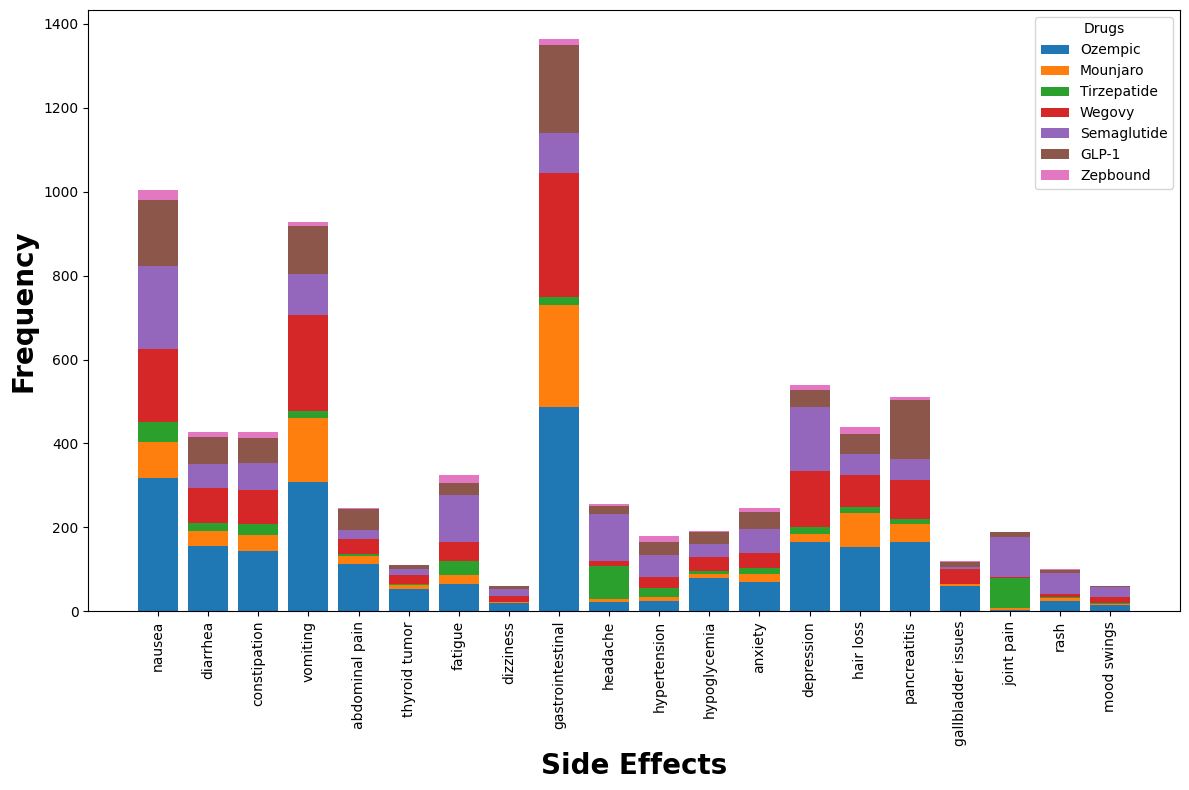

In [ ]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive')

# Load data from CSV file
data_path = '/content/gdrive/My Drive/SideEffectsPaperFINALtables/refiltered_2022_2024_with_sentiment_keyterm_filtered_race_lgbtq_genderfiltered_with_zepbound.csv'
data = pd.read_csv(data_path)

# List of side effects and drugs
side_effects = ['Nausea', 'Diarrhea', 'Constipation', 'Vomiting', 'Abdominal Pain', 'Kidney damage',
                'Thyroid tumor', 'Fatigue', 'Dizziness', 'Gastrointestinal', 'Loss of Appetite',
                'Indigestion', 'Dehydration', 'Headache', 'Swelling', 'Hypertension', 'Allergies',
                'COPD', 'Hypoglycemia', 'Anxiety', 'Depression', 'Heart Palpitations', 'Insomnia',
                'Muscle Cramps', 'Skin Rash', 'Hair Loss', 'Elevated Liver Enzymes', 'Pancreatitis',
                'Vision Changes', 'Gallbladder Issues', 'Dry Mouth', 'Sweating', 'Tingling Sensation',
                'Increased Heart Rate', 'Irregular Menstrual Cycles', 'Excessive Thirst',
                'Jaundice', 'GERD', 'Chest Pain', 'Breathing Difficulties', 'Impaired Concentration',
                'Muscle Weakness', 'Joint Pain', 'Elevated Blood Sugar Levels', 'Seizures', 'Liver Damage',
                'Rash', 'Heat Intolerance', 'Memory Problems', 'Sore Throat', 'Digestive Bleeding',
                'Drowsiness', 'Restlessness', 'Chest Tightness', 'Erectile Dysfunction', 'Facial Swelling',
                'Hand Tremors', 'Persistent Cough', 'Hives', 'Back Pain', 'Shortness of Breath',
                'Abnormal Heart Rhythms', 'Blood Clots', 'Fainting', 'Ear Ringing', 'Elevated Cholesterol Levels',
                'Breast Tenderness', 'Fever', 'Skin Sensitivity', 'Unusual Fatigue', 'Mood Swings']

drugs = ['Ozempic', 'Mounjaro', 'Tirzepatide', 'Wegovy', 'Semaglutide', 'GLP-1', 'Zepbound']
keywords = {
    'Ozempic': ['ozempic', 'ozempy'],
    'Mounjaro': ['mounjaro'],
    'Tirzepatide': ['tirzepatide'],
    'Wegovy': ['wegovy'],
    'Semaglutide': ['semaglutide'],
    'GLP-1': ['glp-1', 'glp-1 agonist', 'glp-1s'],
    'Zepbound': ['zepbound']
}
side_effects = [se.lower() for se in side_effects]
# Convert 'Post Created Date' to datetime
data['Post Created Date'] = pd.to_datetime(data['Post Created Date'])

# Create a dictionary to hold counts of each side effect and drug
drug_side_effect_counts = {side_effect: {drug: 0 for drug in drugs} for side_effect in side_effects}

# Initialize a dictionary to track unique post indices for each drug
drug_post_indices = {drug: set() for drug in drugs}

# Process each post to count drug mentions and track unique post indices
for index, row in data.iterrows():
    message = str(row['Message']).lower()  # Convert message to string and lowercase

    # Check which drugs are mentioned in the message
    mentioned_drugs = set()
    for keyword, drug_list in keywords.items():
        if any(drug.lower() in message for drug in drug_list):
            for drug in drugs:
                if drug.lower() in message:
                    mentioned_drugs.add(drug)
                    drug_post_indices[drug].add(index)

    # Count mentions for each side effect
    for side_effect in side_effects:
        if side_effect in message:
            for drug in mentioned_drugs:
                drug_side_effect_counts[side_effect][drug] += 1

# Filter out side effects with frequencies less than 50
filtered_side_effects = {se: counts for se, counts in drug_side_effect_counts.items() if sum(counts.values()) >= 50}

# Extract the filtered side effects and corresponding counts
filtered_side_effect_names = list(filtered_side_effects.keys())
filtered_drug_counts = {drug: [filtered_side_effects[se].get(drug, 0) for se in filtered_side_effect_names] for drug in drugs}

# Print the total number of posts analyzed
total_unique_posts = len(set.union(*drug_post_indices.values()))
print(f"Total number of posts analyzed: {total_unique_posts}")

# Print the earliest and latest post dates
earliest_post_date = data['Post Created Date'].min()
latest_post_date = data['Post Created Date'].max()
print(f"Earliest post date: {earliest_post_date}")
print(f"Latest post date: {latest_post_date}")

# Print the number of posts for each drug that mention any of these side effects
for drug in drugs:
    print(f"{drug}: {len(drug_post_indices[drug])} posts mention any side effects")

# Create a stacked bar chart
plt.figure(figsize=(12, 8))

bottom = [0] * len(filtered_side_effect_names)
for drug in drugs:
    frequencies = [filtered_drug_counts[drug][i] for i in range(len(filtered_side_effect_names))]
    plt.bar(filtered_side_effect_names, frequencies, label=drug, bottom=bottom)
    bottom = [b + f for b, f in zip(bottom, frequencies)]

plt.xlabel("Side Effects",fontweight = 'bold', fontsize = 20)
plt.ylabel("Frequency", fontweight = 'bold', fontsize = 20)
#plt.title("Frequency of Side Effects for Weight Loss Drugs (Filtered)")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.legend(title='Drugs')  # Add a legend for drugs
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive')

# Load data from the CSV file
data_path = '/content/gdrive/My Drive/SideEffectsPaperFINALtables/refiltered_2022_2024_with_sentiment_keyterm_filtered_race_lgbtq_genderfiltered_with_zepbound.csv'
data = pd.read_csv(data_path)

# Convert 'Post Created Date' to datetime
data['Post Created Date'] = pd.to_datetime(data['Post Created Date'])

# Define the drugs and keywords
drugs = ['Ozempic', 'Mounjaro', 'Tirzepatide', 'Wegovy', 'Semaglutide', 'GLP-1', 'Zepbound']
keywords = {
    'Ozempic': ['ozempic', 'ozempy'],
    'Mounjaro': ['mounjaro'],
    'Tirzepatide': ['tirzepatide'],
    'Wegovy': ['wegovy'],
    'Semaglutide': ['semaglutide'],
    'GLP-1': ['glp-1', 'glp-1 agonist', 'glp-1s'],
    'Zepbound': ['zepbound']
}

# List of side effects to look for in the posts
side_effects = [
    'Nausea', 'Diarrhea', 'Constipation', 'Vomiting', 'Abdominal Pain', 'Kidney damage',
    'Thyroid tumor', 'Fatigue', 'Dizziness', 'Gastrointestinal', 'Loss of Appetite',
    'Indigestion', 'Dehydration', 'Headache', 'Swelling', 'Hypertension', 'Allergies',
    'COPD', 'Hypoglycemia', 'Anxiety', 'Depression', 'Heart Palpitations', 'Insomnia',
    'Muscle Cramps', 'Skin Rash', 'Hair Loss', 'Elevated Liver Enzymes', 'Pancreatitis',
    'Vision Changes', 'Gallbladder Issues', 'Dry Mouth', 'Sweating', 'Tingling Sensation',
    'Increased Heart Rate', 'Mood Swings', 'Irregular Menstrual Cycles', 'Excessive Thirst',
    'Jaundice', 'GERD', 'Chest Pain', 'Breathing Difficulties', 'Impaired Concentration',
    'Muscle Weakness', 'Joint Pain', 'Elevated Blood Sugar Levels', 'Seizures', 'Liver Damage',
    'Rash', 'Heat Intolerance', 'Memory Problems', 'Sore Throat', 'Digestive Bleeding',
    'Drowsiness', 'Restlessness', 'Chest Tightness', 'Erectile Dysfunction', 'Facial Swelling',
    'Hand Tremors', 'Persistent Cough', 'Hives', 'Back Pain', 'Shortness of Breath',
    'Abnormal Heart Rhythms', 'Blood Clots', 'Fainting', 'Ear Ringing', 'Elevated Cholesterol Levels',
    'Breast Tenderness', 'Fever', 'Skin Sensitivity', 'Unusual Fatigue', 'Mood Swings'
]

# Initialize counts
side_effect_counts = pd.DataFrame(index=side_effects, columns=drugs).fillna(0)

# Count occurrences for each side effect per drug
for index, row in data.iterrows():
    post_text = str(row['Message']).lower()
    for drug, terms in keywords.items():
        if any(term in post_text for term in terms):
            for side_effect in side_effects:
                if side_effect.lower() in post_text:
                    side_effect_counts.at[side_effect, drug] += 1

# Make sure to handle cases where drug is not mentioned in the post
side_effect_counts = side_effect_counts.fillna(0)  # Fill NaN with 0

# Calculate percentages only for drugs that have any counts
total_counts = side_effect_counts.sum(axis=0)
side_effect_percentages = (side_effect_counts / total_counts) * 100

# Filter out rows where the total count is zero across all drugs
side_effect_percentages = side_effect_percentages[side_effect_percentages.sum(axis=1) > 0]

# Add a 'Total' column that sums each side effect across all drugs
side_effect_percentages['Total'] = side_effect_percentages.sum(axis=1)

# Save the DataFrame to a CSV
output_path = '/content/gdrive/My Drive/SideEffectsPaperFINALtables/AppendixE_side_effects_percentageswithrespecttodrug.csv'
side_effect_percentages.to_csv(output_path)

# Print the path for confirmation
print(f'CSV file saved at: {output_path}')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


<ipython-input-29-78e9252b7b5f>:9: DtypeWarning: Columns (3,4,6,7,8,9,10,11,12,13,14,15,16,18,19,31,33,35,36,45,48,51,53,54,57,58,59,61,62,67,79,104,105,106,107,108) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(data_path)
<ipython-input-29-78e9252b7b5f>:45: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  side_effect_counts = pd.DataFrame(index=side_effects, columns=drugs).fillna(0)


CSV file saved at: /content/gdrive/My Drive/SideEffectsPaperFINALtables/AppendixE_side_effects_percentageswithrespecttodrug.csv


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


<ipython-input-3-36046b1909d7>:10: DtypeWarning: Columns (3,4,6,7,8,9,10,11,12,13,14,15,16,18,19,31,33,35,36,45,48,51,53,54,57,58,59,61,62,67,79,104,105,106,107,108) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(data_path)
<ipython-input-3-36046b1909d7>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  side_effects_data['Month'] = side_effects_data['Post Created Date'].dt.to_period('M').astype(str)
<ipython-input-3-36046b1909d7>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

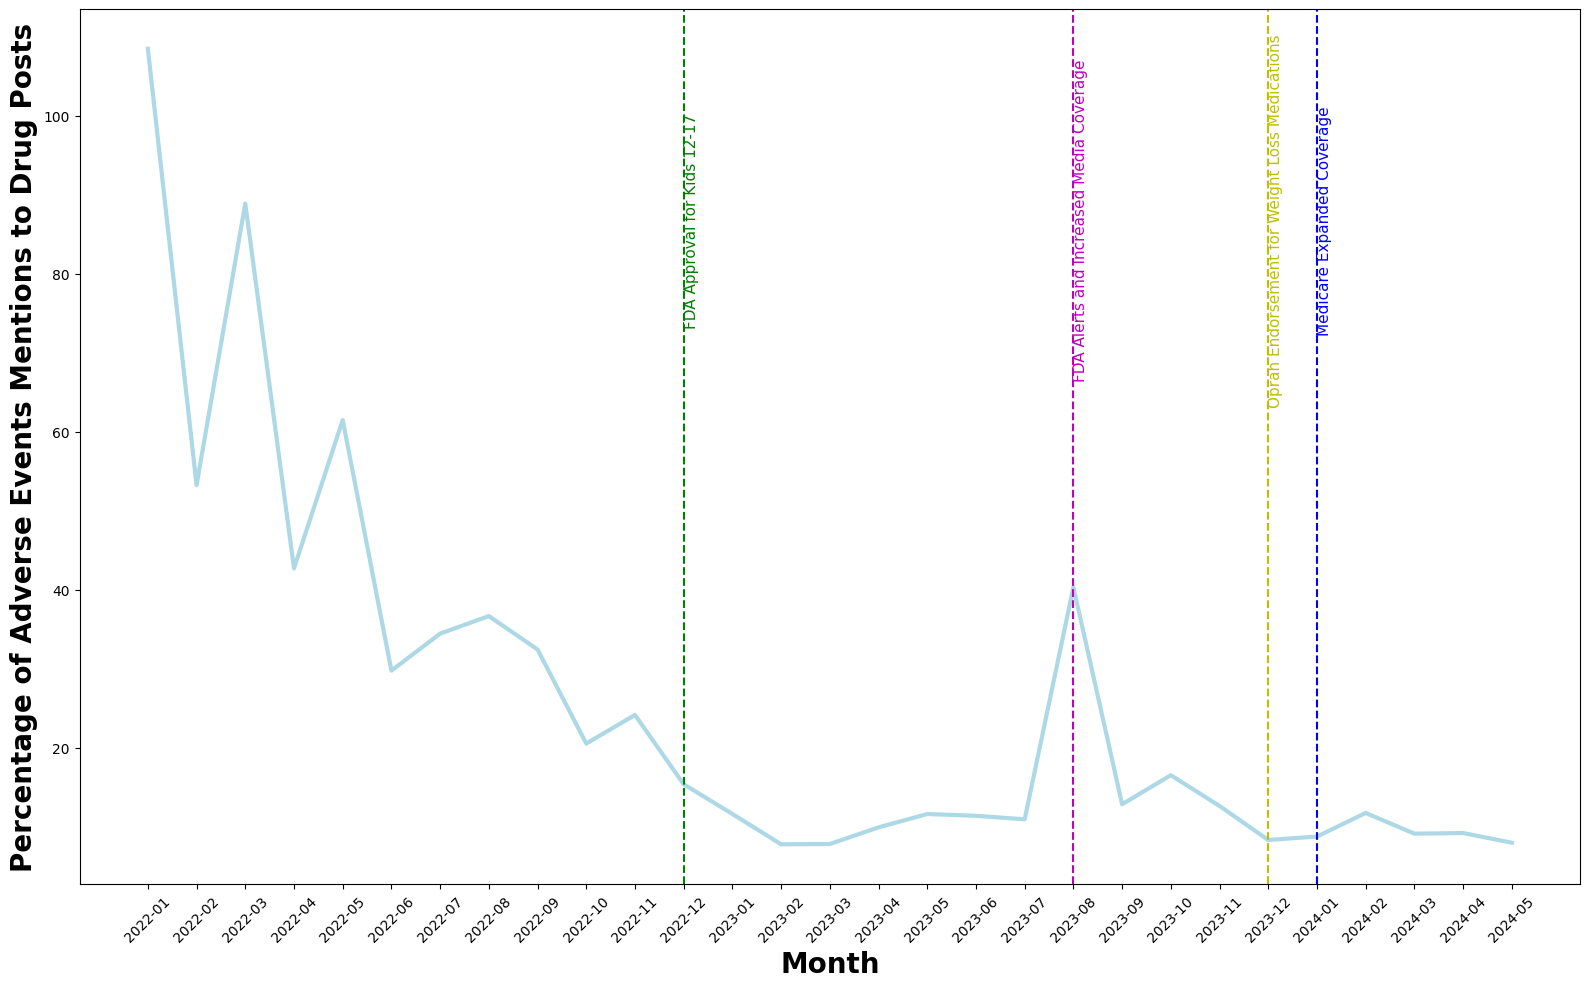

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive')

# Load data from CSV file
data_path = '/content/gdrive/My Drive/SideEffectsPaperFINALtables/refiltered_2022_2024_with_sentiment_keyterm_filtered_race_lgbtq_genderfiltered_with_zepbound.csv'
data = pd.read_csv(data_path)

# Convert 'Post Created Date' to datetime
data['Post Created Date'] = pd.to_datetime(data['Post Created Date'], errors='coerce')

# Drop rows where 'Post Created Date' could not be converted
data = data.dropna(subset=['Post Created Date'])

# Define drugs and side effects
drugs = ['ozempic', 'wegovy', 'mounjaro', 'tirzepatide', 'semaglutide', 'glp-1','zepbound']
side_effects = [
    'nausea', 'diarrhea', 'constipation', 'vomiting', 'abdominal pain',
    'dizziness', 'fatigue', 'headache', 'swelling', 'gastrointestinal',
    'loss of appetite', 'indigestion', 'dehydration', 'sweating', 'tingling sensation',
    'dry mouth', 'restlessness', 'hand tremors', 'persistent cough', 'sore throat',
    'chest pain', 'breathing difficulties', 'mood swings', 'increased heart rate',
    'muscle cramps', 'back pain', 'shortness of breath', 'skin rash', 'hives',
    'facial swelling', 'elevated blood sugar levels', 'seizures', 'elevated cholesterol levels',
    'fever', 'abnormal heart rhythms', 'ear ringing', 'jaundice', 'kidney damage',
    'thyroid tumor', 'elevated liver enzymes', 'pancreatitis', 'vision changes',
    'gallbladder issues', 'hypertension', 'allergies', 'copd', 'hypoglycemia', 'anxiety',
    'depression', 'heart palpitations', 'insomnia', 'muscle weakness', 'joint pain',
    'liver damage', 'heat intolerance', 'memory problems', 'digestive bleeding',
    'erectile dysfunction', 'blood clots', 'fainting', 'skin sensitivity', 'unusual fatigue',
    'breast tenderness'
]

# Filter data for side effects and drugs
side_effects_data = data[data['Message'].str.contains('|'.join(side_effects), case=False, na=False)]
drugs_data = data[data['Message'].str.contains('|'.join(drugs), case=False, na=False)]

# Extract month and year for grouping
side_effects_data['Month'] = side_effects_data['Post Created Date'].dt.to_period('M').astype(str)
drugs_data['Month'] = drugs_data['Post Created Date'].dt.to_period('M').astype(str)

# Count occurrences by month
monthly_side_effects = side_effects_data.groupby('Month').size()
unique_drug_posts = drugs_data.groupby('Month')['Message'].nunique()

# Align indices and calculate the percentage
all_months = pd.date_range(
    start=min(monthly_side_effects.index.min(), unique_drug_posts.index.min()),
    end=max(monthly_side_effects.index.max(), unique_drug_posts.index.max()),
    freq='M'
).strftime('%Y-%m')

monthly_side_effects = monthly_side_effects.reindex(all_months, fill_value=0)
unique_drug_posts = unique_drug_posts.reindex(all_months, fill_value=0)
monthly_percentages = (monthly_side_effects / unique_drug_posts.replace(0, pd.NA)) * 100

# Define event dates, labels, and colors
events = {
    'December 1, 2022': ('FDA Approval for Kids 12-17', 'g'),
    'August 5, 2023': ('FDA Alerts and Increased Media Coverage', 'm'),
    'December 23, 2023': ('Oprah Endorsement for Weight Loss Medications', 'y'),
    'January 1, 2024': ('Medicare Expanded Coverage', 'b')
}

# Plotting
plt.figure(figsize=(16, 10))
plt.plot(monthly_percentages.index, monthly_percentages, linestyle='-', color='#ADD8E6', linewidth=3, label='% Side Effects Mentions / Unique Drug Posts')

# Add vertical dotted lines and labels for each event
for date_str, (label, color) in events.items():
    event_date = pd.Timestamp(date_str).strftime('%Y-%m')
    plt.axvline(x=event_date, color=color, linestyle='--', label=label)

    # Adjust label position for clarity
    y_position = monthly_percentages.max() * 0.8
    plt.text(event_date, y_position, label, color=color, rotation=90, va='center', ha='left', fontsize=11)

# Add labels to the plot
plt.xlabel('Month', fontsize=20, fontweight='bold')
plt.ylabel('Percentage of Adverse Events Mentions to Drug Posts', fontsize=20, fontweight='bold')
plt.grid(False)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Assuming the data has been loaded into a dataframe `data`
# Ensure that the 'Post Created Date' is in datetime format
data['Post Created Date'] = pd.to_datetime(data['Post Created Date'])

# List of drugs and their keywords
drugs = ['Ozempic', 'Mounjaro', 'Tirzepatide', 'Wegovy', 'Semaglutide', 'GLP-1', 'Zepbound']
keywords = {
    'Ozempic': ['ozempic', 'ozempy'],
    'Mounjaro': ['mounjaro'],
    'Tirzepatide': ['tirzepatide'],
    'Wegovy': ['wegovy'],
    'Semaglutide': ['semaglutide'],
    'GLP-1': ['glp-1', 'glp-1 agonist', 'glp-1s'],
    'Zepbound': ['zepbound']
}

# List of side effects to track
side_effects = [
    'Nausea', 'Diarrhea', 'Constipation', 'Vomiting', 'Abdominal Pain', 'Kidney damage',
    'Thyroid tumor', 'Fatigue', 'Dizziness', 'Gastrointestinal', 'Loss of Appetite',
    'Indigestion', 'Dehydration', 'Headache', 'Swelling', 'Hypertension', 'Allergies',
    'COPD', 'Hypoglycemia', 'Anxiety', 'Depression', 'Heart Palpitations', 'Insomnia',
    'Muscle Cramps', 'Skin Rash', 'Hair Loss', 'Elevated Liver Enzymes', 'Pancreatitis',
    'Vision Changes', 'Gallbladder Issues', 'Dry Mouth', 'Sweating', 'Tingling Sensation',
    'Increased Heart Rate', 'Mood Swings', 'Irregular Menstrual Cycles', 'Excessive Thirst',
    'Jaundice', 'GERD', 'Chest Pain', 'Breathing Difficulties', 'Impaired Concentration',
    'Muscle Weakness', 'Joint Pain', 'Elevated Blood Sugar Levels', 'Seizures', 'Liver Damage',
    'Rash', 'Heat Intolerance', 'Memory Problems', 'Sore Throat', 'Digestive Bleeding',
    'Drowsiness', 'Restlessness', 'Chest Tightness', 'Erectile Dysfunction', 'Facial Swelling',
    'Hand Tremors', 'Persistent Cough', 'Hives', 'Back Pain', 'Shortness of Breath',
    'Abnormal Heart Rhythms', 'Blood Clots', 'Fainting', 'Ear Ringing', 'Elevated Cholesterol Levels',
    'Breast Tenderness', 'Fever', 'Skin Sensitivity', 'Unusual Fatigue', 'Mood Swings'
]

# Initialize columns to store the counts
monthly_counts = {
    "Month": [],
    "Total Side Effect Mentions": [],
    "Total Drug Mentions": [],
    "Side Effect Percentage": []
}

# Group by month
data['Month'] = data['Post Created Date'].dt.to_period('M')

# Loop through each month and calculate the counts
for month, month_data in data.groupby('Month'):
    total_side_effect_mentions = 0
    total_drug_mentions = 0

    # Check mentions for side effects and drugs
    for _, row in month_data.iterrows():
        post_text = str(row['Message']).lower()

        # Count drug mentions
        for drug, terms in keywords.items():
            if any(term in post_text for term in terms):
                total_drug_mentions += 1

        # Count side effect mentions
        for side_effect in side_effects:
            if side_effect.lower() in post_text:
                total_side_effect_mentions += 1

    # Calculate the side effect percentage
    if total_drug_mentions > 0:
        side_effect_percentage = (total_side_effect_mentions / total_drug_mentions) * 100
    else:
        side_effect_percentage = 0

    # Add the results for this month
    monthly_counts["Month"].append(str(month))
    monthly_counts["Total Side Effect Mentions"].append(total_side_effect_mentions)
    monthly_counts["Total Drug Mentions"].append(total_drug_mentions)
    monthly_counts["Side Effect Percentage"].append(side_effect_percentage)

# Create a DataFrame from the results
monthly_df = pd.DataFrame(monthly_counts)

# Save the DataFrame to a CSV
output_path = '/content/gdrive/My Drive/SideEffectsPaperFINALtables/monthly_side_effects.csv'
monthly_df.to_csv(output_path, index=False)

# Print confirmation
print(f'CSV file saved at: {output_path}')


CSV file saved at: /content/gdrive/My Drive/SideEffectsPaperFINALtables/monthly_side_effects.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive')

# Load data from CSV file
data_path = '/content/gdrive/My Drive/SideEffectsPaperFINALtables/refiltered_2022_2024_with_sentiment_keyterm_filtered_race_lgbtq_genderfiltered_with_zepbound.csv'
data = pd.read_csv(data_path)
# Assuming 'Post ID' is the column for unique post identification
# Check the column names to ensure the 'Post ID' column is correctly referenced
print(data.columns)

# Find the total number of unique posts based on the 'Post ID' column
unique_posts = data['Message'].nunique()

# Output the total number of unique posts
print(f"Total unique posts: {unique_posts}")


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


<ipython-input-4-5ff5cacfd77e>:10: DtypeWarning: Columns (3,4,6,7,8,9,10,11,12,13,14,15,16,18,19,31,33,35,36,45,48,51,53,54,57,58,59,61,62,67,79,104,105,106,107,108) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(data_path)


Index(['Unnamed: 0.1', 'Unnamed: 0', 'activities', 'content_type',
       'creation_time', 'Post Id', 'is_branded_content', 'lang',
       'link_attachment.caption', 'link_attachment.description',
       ...
       'Overperforming Score', 'gendered_lgbtq_terms1', 'lgbtq1',
       'lgbtqgendercat1', 'gendered_lgbtq_terms2', 'lgbtq2', 'lgbtqgendercat2',
       'gendered_lgbtq_terms3', 'lgbtq3', 'lgbtqgendercat3'],
      dtype='object', length=115)
Total unique posts: 50013


In [ ]:
# Calculate total mentions for each drug
drug_mentions_count = {}

for drug, drug_keywords in keywords.items():
    # Count posts mentioning any of the keywords for the drug
    drug_mentions_count[drug] = sum(
        1 for _, row in data.iterrows() if any(kw in str(row['Message']).lower() for kw in drug_keywords)
    )

# Print the results
print("Total number of posts mentioning each drug:")
for drug, count in drug_mentions_count.items():
    print(f"{drug}: {count}")


Total number of posts mentioning each drug:
Ozempic: 18733
Mounjaro: 4031
Tirzepatide: 4202
Wegovy: 8527
Semaglutide: 17146
GLP-1: 4885
Zepbound: 1769


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


<ipython-input-6-a07e6f486f8e>:10: DtypeWarning: Columns (3,4,6,7,8,9,10,11,12,13,14,15,16,18,19,31,33,35,36,45,48,51,53,54,57,58,59,61,62,67,79,104,105,106,107,108) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(data_path)
<ipython-input-6-a07e6f486f8e>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  side_effects_data['Month'] = side_effects_data['Post Created Date'].dt.to_period('M').astype(str)
<ipython-input-6-a07e6f486f8e>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

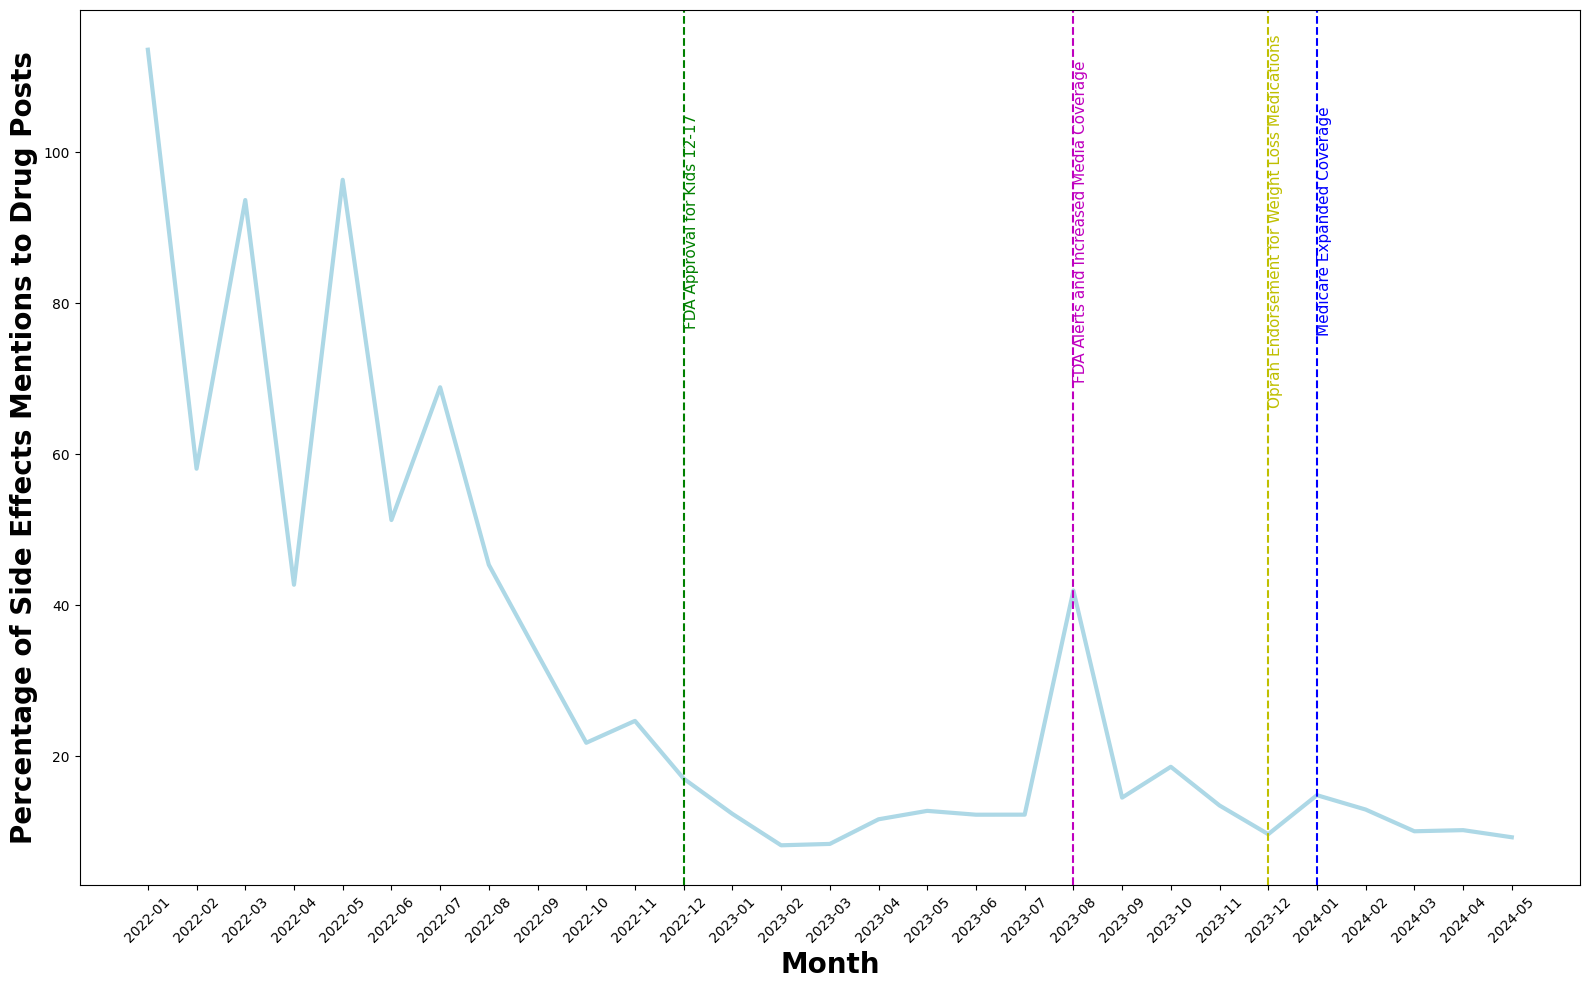

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive')

# Load data from CSV file
data_path = '/content/gdrive/My Drive/SideEffectsPaperFINALtables/refiltered_2022_2024_with_sentiment_keyterm_filtered_race_lgbtq_genderfiltered_with_zepbound.csv'
data = pd.read_csv(data_path)

# Convert 'Post Created Date' to datetime
data['Post Created Date'] = pd.to_datetime(data['Post Created Date'], errors='coerce')

# Drop rows where 'Post Created Date' could not be converted
data = data.dropna(subset=['Post Created Date'])

# Define drugs and side effects
drugs = ['ozempic', 'wegovy', 'mounjaro', 'tirzepatide', 'semaglutide', 'glp-1','zepbound']
side_effects = [
    'Nausea', 'Diarrhea', 'Constipation', 'Vomiting', 'Abdominal Pain', 'Kidney damage',
    'Thyroid tumor', 'Fatigue', 'Dizziness', 'Gastrointestinal', 'Loss of Appetite',
    'Indigestion', 'Dehydration', 'Headache', 'Swelling', 'Hypertension', 'Allergies',
    'COPD', 'Hypoglycemia', 'Anxiety', 'Depression', 'Heart Palpitations', 'Insomnia',
    'Muscle Cramps', 'Skin Rash', 'Hair Loss', 'Elevated Liver Enzymes', 'Pancreatitis',
    'Vision Changes', 'Gallbladder Issues', 'Dry Mouth', 'Sweating', 'Tingling Sensation',
    'Increased Heart Rate', 'Mood Swings', 'Irregular Menstrual Cycles', 'Excessive Thirst',
    'Jaundice', 'GERD', 'Chest Pain', 'Breathing Difficulties', 'Impaired Concentration',
    'Muscle Weakness', 'Joint Pain', 'Elevated Blood Sugar Levels', 'Seizures', 'Liver Damage',
    'Rash', 'Heat Intolerance', 'Memory Problems', 'Sore Throat', 'Digestive Bleeding',
    'Drowsiness', 'Restlessness', 'Chest Tightness', 'Erectile Dysfunction', 'Facial Swelling',
    'Hand Tremors', 'Persistent Cough', 'Hives', 'Back Pain', 'Shortness of Breath',
    'Abnormal Heart Rhythms', 'Blood Clots', 'Fainting', 'Ear Ringing', 'Elevated Cholesterol Levels',
    'Breast Tenderness', 'Fever', 'Skin Sensitivity', 'Unusual Fatigue', 'Mood Swings'
]

# Filter data for side effects and drugs
side_effects_data = data[data['Message'].str.contains('|'.join(side_effects), case=False, na=False)]
drugs_data = data[data['Message'].str.contains('|'.join(drugs), case=False, na=False)]

# Extract month and year for grouping
side_effects_data['Month'] = side_effects_data['Post Created Date'].dt.to_period('M').astype(str)
drugs_data['Month'] = drugs_data['Post Created Date'].dt.to_period('M').astype(str)

# Count occurrences by month
monthly_side_effects = side_effects_data.groupby('Month').size()
unique_drug_posts = drugs_data.groupby('Month')['Message'].nunique()

# Align indices and calculate the percentage
all_months = pd.date_range(
    start=min(monthly_side_effects.index.min(), unique_drug_posts.index.min()),
    end=max(monthly_side_effects.index.max(), unique_drug_posts.index.max()),
    freq='M'
).strftime('%Y-%m')

monthly_side_effects = monthly_side_effects.reindex(all_months, fill_value=0)
unique_drug_posts = unique_drug_posts.reindex(all_months, fill_value=0)
monthly_percentages = (monthly_side_effects / unique_drug_posts.replace(0, pd.NA)) * 100

# Define event dates, labels, and colors
events = {
    'December 1, 2022': ('FDA Approval for Kids 12-17', 'g'),
    'August 5, 2023': ('FDA Alerts and Increased Media Coverage', 'm'),
    'December 23, 2023': ('Oprah Endorsement for Weight Loss Medications', 'y'),
    'January 1, 2024': ('Medicare Expanded Coverage', 'b')
}

# Plotting
plt.figure(figsize=(16, 10))
plt.plot(monthly_percentages.index, monthly_percentages, linestyle='-', color='#ADD8E6', linewidth=3, label='% Side Effects Mentions / Unique Drug Posts')

# Add vertical dotted lines and labels for each event
for date_str, (label, color) in events.items():
    event_date = pd.Timestamp(date_str).strftime('%Y-%m')
    plt.axvline(x=event_date, color=color, linestyle='--', label=label)

    # Adjust label position for clarity
    y_position = monthly_percentages.max() * 0.8
    plt.text(event_date, y_position, label, color=color, rotation=90, va='center', ha='left', fontsize=11)

# Add labels to the plot
plt.xlabel('Month', fontsize=20, fontweight='bold')
plt.ylabel('Percentage of Side Effects Mentions to Drug Posts', fontsize=20, fontweight='bold')
plt.grid(False)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive')

# Load data from CSV file
data_path = '/content/gdrive/My Drive/SideEffectsPaperTables/refiltered_2022_2024_with_sentiment_keyterm_filtered_race_lgbtq_genderfiltered2.csv'
data = pd.read_csv(data_path)

# Convert 'Post Created Date' to datetime
data['Post Created Date'] = pd.to_datetime(data['Post Created Date'], errors='coerce')

# Drop rows where 'Post Created Date' could not be converted
data = data.dropna(subset=['Post Created Date'])

# Define drugs and side effects
drugs = ['ozempic', 'wegovy', 'mounjaro', 'tirzepatide', 'semaglutide', 'glp-1','zepbound']
side_effects = [
    'Nausea', 'Diarrhea', 'Constipation', 'Vomiting', 'Abdominal Pain', 'Kidney damage',
    'Thyroid tumor', 'Fatigue', 'Dizziness', 'Gastrointestinal', 'Loss of Appetite',
    'Indigestion', 'Dehydration', 'Headache', 'Swelling', 'Hypertension', 'Allergies',
    'COPD', 'Hypoglycemia', 'Anxiety', 'Depression', 'Heart Palpitations', 'Insomnia',
    'Muscle Cramps', 'Skin Rash', 'Hair Loss', 'Elevated Liver Enzymes', 'Pancreatitis',
    'Vision Changes', 'Gallbladder Issues', 'Dry Mouth', 'Sweating', 'Tingling Sensation',
    'Increased Heart Rate', 'Mood Swings', 'Irregular Menstrual Cycles', 'Excessive Thirst',
    'Jaundice', 'GERD', 'Chest Pain', 'Breathing Difficulties', 'Impaired Concentration',
    'Muscle Weakness', 'Joint Pain', 'Elevated Blood Sugar Levels', 'Seizures', 'Liver Damage',
    'Rash', 'Heat Intolerance', 'Memory Problems', 'Sore Throat', 'Digestive Bleeding',
    'Drowsiness', 'Restlessness', 'Chest Tightness', 'Erectile Dysfunction', 'Facial Swelling',
    'Hand Tremors', 'Persistent Cough', 'Hives', 'Back Pain', 'Shortness of Breath',
    'Abnormal Heart Rhythms', 'Blood Clots', 'Fainting', 'Ear Ringing', 'Elevated Cholesterol Levels',
    'Breast Tenderness', 'Fever', 'Skin Sensitivity', 'Unusual Fatigue', 'Mood Swings'
]

# Filter data for side effects and drugs
side_effects_data = data[data['Message'].str.contains('|'.join(side_effects), case=False, na=False)]
drugs_data = data[data['Message'].str.contains('|'.join(drugs), case=False, na=False)]

# Extract month and year for grouping
side_effects_data['Month'] = side_effects_data['Post Created Date'].dt.to_period('M').astype(str)
drugs_data['Month'] = drugs_data['Post Created Date'].dt.to_period('M').astype(str)

# Count occurrences by month
monthly_side_effects = side_effects_data.groupby('Month').size()
unique_drug_posts = drugs_data.groupby('Month')['Message'].nunique()

# Align indices and calculate the percentage
all_months = pd.date_range(
    start=min(monthly_side_effects.index.min(), unique_drug_posts.index.min()),
    end=max(monthly_side_effects.index.max(), unique_drug_posts.index.max()),
    freq='M'
).strftime('%Y-%m')

monthly_side_effects = monthly_side_effects.reindex(all_months, fill_value=0)
unique_drug_posts = unique_drug_posts.reindex(all_months, fill_value=0)
monthly_percentages = (monthly_side_effects / unique_drug_posts.replace(0, pd.NA)) * 100

# Combine all the information into a DataFrame for easier display
summary_df = pd.DataFrame({
    'Month': all_months,
    'Total Side Effect Mentions': monthly_side_effects.values,
    'Total Drug Mentions': unique_drug_posts.values,
    'Side Effect Percentage': monthly_percentages.values
})

# Filter the range of months from 01-2022 to 05-2024
summary_df_filtered = summary_df[(summary_df['Month'] >= '2022-01') & (summary_df['Month'] <= '2024-05')]

# Define the path to save the CSV file
output_path = '/content/gdrive/My Drive/SideEffectsPaperFINALtables/summary_df_filtered_output.csv'

# Save the filtered DataFrame as a CSV file
summary_df_filtered.to_csv(output_path, index=False)

# Print confirmation message
print(f"CSV file saved at: {output_path}")


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


<ipython-input-3-38e1010d67fb>:10: DtypeWarning: Columns (15,41,42,57,59,60,61,62,63,72,73,74,76,77) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(data_path)
<ipython-input-3-38e1010d67fb>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  side_effects_data['Month'] = side_effects_data['Post Created Date'].dt.to_period('M').astype(str)
<ipython-input-3-38e1010d67fb>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drugs_data['Month'] = drugs_data['Post Create

CSV file saved at: /content/gdrive/My Drive/SideEffectsPaperFINALtables/summary_df_filtered_output.csv


In [ ]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive')

# Load data
data_path = '/content/gdrive/My Drive/SideEffectsPaperFINALtables/refiltered_2022_2024_with_sentiment_keyterm_filtered_race_lgbtq_genderfiltered_with_zepbound.csv'
data = pd.read_csv(data_path)

# Side effects and drug terms
side_effects = ['Nausea', 'Diarrhea', 'Constipation', 'Vomiting', 'Abdominal Pain', 'Kidney damage',
                'Thyroid tumor', 'Fatigue', 'Dizziness', 'Gastrointestinal', 'Loss of Appetite',
                'Indigestion', 'Dehydration', 'Headache', 'Swelling', 'Hypertension', 'Allergies',
                'COPD', 'Hypoglycemia', 'Anxiety', 'Depression', 'Heart Palpitations', 'Insomnia',
                'Muscle Cramps', 'Skin Rash', 'Hair Loss', 'Elevated Liver Enzymes', 'Pancreatitis',
                'Vision Changes', 'Gallbladder Issues', 'Dry Mouth', 'Sweating', 'Tingling Sensation',
                'Increased Heart Rate', 'Irregular Menstrual Cycles', 'Excessive Thirst',
                'Jaundice', 'GERD', 'Chest Pain', 'Breathing Difficulties', 'Impaired Concentration',
                'Muscle Weakness', 'Joint Pain', 'Elevated Blood Sugar Levels', 'Seizures', 'Liver Damage',
                'Rash', 'Heat Intolerance', 'Memory Problems', 'Sore Throat', 'Digestive Bleeding',
                'Drowsiness', 'Restlessness', 'Chest Tightness', 'Erectile Dysfunction', 'Facial Swelling',
                'Hand Tremors', 'Persistent Cough', 'Hives', 'Back Pain', 'Shortness of Breath',
                'Abnormal Heart Rhythms', 'Blood Clots', 'Fainting', 'Ear Ringing', 'Elevated Cholesterol Levels',
                'Breast Tenderness', 'Fever', 'Skin Sensitivity', 'Unusual Fatigue', 'Mood Swings']

drugs = ['GLP-1','Semaglutide','Ozempic','Wegovy','Mounjaro','Tirzepatide','Zepbound']
keywords = {
    'Ozempic': ['ozempic', 'ozempy'],
    'Mounjaro': ['mounjaro'],
    'Tirzepatide': ['tirzepatide'],
    'Wegovy': ['wegovy'],
    'Semaglutide': ['semaglutide'],
    'GLP-1': ['glp-1', 'glp-1 agonist', 'glp-1s'],
    'Zepbound': ['zepbound']
}

# Initialize counts
drug_mentions = {drug: 0 for drug in drugs}
drug_side_effect_counts = {drug: {se: 0 for se in side_effects} for drug in drugs}

# Count mentions
for _, row in data.iterrows():
    message = str(row['Message']).lower()
    if pd.isna(message) or message.strip() == '':
        continue

    mentioned_drugs = set()
    for drug, drug_keywords in keywords.items():
        if any(keyword in message for keyword in drug_keywords):
            mentioned_drugs.add(drug)
            drug_mentions[drug] += 1

    for se in side_effects:
        if se.lower() in message:
            for drug in mentioned_drugs:
                drug_side_effect_counts[drug][se] += 1

# Format output as numerator/denominator = N (%)
formatted_data = {}
for drug in drugs:
    total = drug_mentions[drug]
    formatted_data[drug] = {}
    for se in side_effects:
        count = drug_side_effect_counts[drug][se]
        if total > 0:
          pct = (count / total) * 100
          formatted_data[drug][se] = f"{count} ({pct:.1f}%)"
        else:
          formatted_data[drug][se] = "0 (0.0%)"



# Convert to DataFrame
df_formatted = pd.DataFrame(formatted_data).fillna("")

# Save
output_path = '/content/gdrive/My Drive/SideEffectsPaperFINALtables/table2_final_format_n_percent.csv'
df_formatted.to_csv(output_path)

print(f"Formatted Table 2 saved to {output_path}")
df_formatted.head()


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


<ipython-input-6-28cf41ec102a>:9: DtypeWarning: Columns (3,4,6,7,8,9,10,11,12,13,14,15,16,18,19,31,33,35,36,45,48,51,53,54,57,58,59,61,62,67,79,104,105,106,107,108) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(data_path)


Formatted Table 2 saved to /content/gdrive/My Drive/SideEffectsPaperFINALtables/table2_final_format_n_percent.csv


,GLP-1,Semaglutide,Ozempic,Wegovy,Mounjaro,Tirzepatide,Zepbound
Nausea,158 (3.2%),197 (1.1%),317 (1.7%),175 (2.1%),86 (2.1%),48 (1.1%),23 (1.3%)
Diarrhea,64 (1.3%),59 (0.3%),155 (0.8%),83 (1.0%),36 (0.9%),19 (0.5%),12 (0.7%)
Constipation,59 (1.2%),64 (0.4%),143 (0.8%),82 (1.0%),38 (0.9%),26 (0.6%),16 (0.9%)
Vomiting,113 (2.3%),99 (0.6%),308 (1.6%),228 (2.7%),153 (3.8%),17 (0.4%),11 (0.6%)
Abdominal Pain,51 (1.0%),22 (0.1%),112 (0.6%),34 (0.4%),19 (0.5%),6 (0.1%),2 (0.1%)
